# House Prices Competition

Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy

from scipy.stats import boxcox, yeojohnson
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from tqdm.auto import tqdm
from IPython.display import display

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## EDA

In [2]:
pd.read_csv('home-data/sample_submission.csv').head(3)

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570

In [3]:
df_train = pd.read_csv('home-data/train.csv')
df_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

In [4]:
df_test = pd.read_csv('home-data/test.csv')
df_test.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       1961.0          Unf         1.0       730.0         TA   
1     Attchd       1958.0          Unf         1.0       312.0         TA   
2     Attchd       1997.0          Fin         2.0       482.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y         140            0              0          0   
1         TA          Y         393           36              0          0   
2         TA          Y         212           34              0          0   

   ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold  \
0          120         0    NaN  MnPrv         NaN        0       6    2010   
1            0         0    NaN    NaN        Gar2    12500       6    2010   
2            0         0    NaN  MnPrv         NaN        0       3    2010   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal

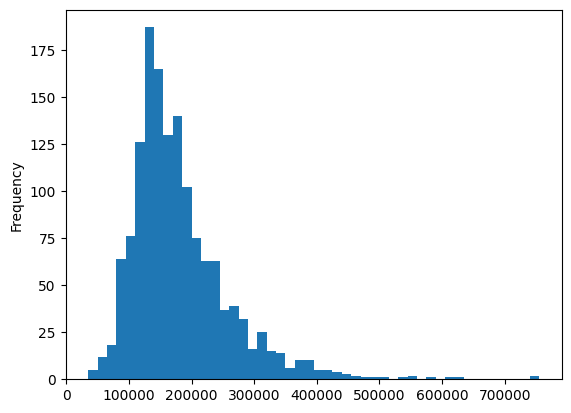

In [5]:
df_train['SalePrice'].plot(kind='hist', bins=48)
plt.show()

In [6]:
def get_summary_df(df):
    return pd.concat([pd.DataFrame({
        'Column': df.columns,
        'Data_Type': df.dtypes,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Unique_Count': df.nunique()
    }).set_index('Column'), df.describe().T], axis=1)

In [7]:
df_train_summary = get_summary_df(df_train)
df_train_summary

Data_Type  Non_Null_Count  Null_Count  Unique_Count   count  \
Id                int64            1460           0          1460  1460.0   
MSSubClass        int64            1460           0            15  1460.0   
MSZoning         object            1460           0             5     NaN   
LotFrontage     float64            1201         259           110  1201.0   
LotArea           int64            1460           0          1073  1460.0   
Street           object            1460           0             2     NaN   
Alley            object              91        1369             2     NaN   
LotShape         object            1460           0             4     NaN   
LandContour      object            1460           0             4     NaN   
Utilities        object            1460           0             2     NaN   
LotConfig        object            1460           0             5     NaN   
LandSlope        object            1460           0             3     NaN   
Neighborhood     object            1460           0            25     NaN   
Condition1       object            1460           0             9     NaN   
Condition2       object            1460           0             8     NaN   
BldgType         object            1460           0             5     NaN   
HouseStyle       object            1460           0             8     NaN   
OverallQual       int64            1460           0            10  1460.0   
OverallCond       int64            1460           0             9  1460.0   
YearBuilt         int64            1460           0           112  1460.0   
YearRemodAdd      int64            1460           0            61  1460.0   
RoofStyle        object            1460           0             6     NaN   
RoofMatl         object            1460           0             8     NaN   
Exterior1st      object            1460           0            15     NaN   
Exterior2nd      object            1460           0            16     NaN   
MasVnrType       object             588         872             3     NaN   
MasVnrArea      float64            1452           8           327  1452.0   
ExterQual        object            1460           0             4     NaN   
ExterCond        object            1460           0             5     NaN   
Foundation       object            1460           0             6     NaN   
BsmtQual         object            1423          37             4     NaN   
BsmtCond         object            1423          37             4     NaN   
BsmtExposure     object            1422          38             4     NaN   
BsmtFinType1     object            1423          37             6     NaN   
BsmtFinSF1        int64            1460           0           637  1460.0   
BsmtFinType2     object            1422          38             6     NaN   
BsmtFinSF2        int64            1460           0           144  1460.0   
BsmtUnfSF         int64            1460           0           780  1460.0   
TotalBsmtSF       int64            1460           0           721  1460.0   
Heating          object            1460           0             6     NaN   
HeatingQC        object            1460           0             5     NaN   
CentralAir       object            1460           0             2     NaN   
Electrical       object            1459           1             5     NaN   
1stFlrSF          int64            1460           0           753  1460.0   
2ndFlrSF          int64            1460           0           417  1460.0   
LowQualFinSF      int64            1460           0            24  1460.0   
GrLivArea         int64            1460           0           861  1460.0   
BsmtFullBath      int64            1460           0             4  1460.0   
BsmtHalfBath      int64            1460           0             3  1460.0   
FullBath          int64            1460           0             4  1460.0   
HalfBath          int64            1460           0             3  1460.0   
BedroomAbv

In [8]:
df_test_summary = get_summary_df(df_test)
df_test_summary

Data_Type  Non_Null_Count  Null_Count  Unique_Count   count  \
Id                int64            1459           0          1459  1459.0   
MSSubClass        int64            1459           0            16  1459.0   
MSZoning         object            1455           4             5     NaN   
LotFrontage     float64            1232         227           115  1232.0   
LotArea           int64            1459           0          1106  1459.0   
Street           object            1459           0             2     NaN   
Alley            object             107        1352             2     NaN   
LotShape         object            1459           0             4     NaN   
LandContour      object            1459           0             4     NaN   
Utilities        object            1457           2             1     NaN   
LotConfig        object            1459           0             5     NaN   
LandSlope        object            1459           0             3     NaN   
Neighborhood     object            1459           0            25     NaN   
Condition1       object            1459           0             9     NaN   
Condition2       object            1459           0             5     NaN   
BldgType         object            1459           0             5     NaN   
HouseStyle       object            1459           0             7     NaN   
OverallQual       int64            1459           0            10  1459.0   
OverallCond       int64            1459           0             9  1459.0   
YearBuilt         int64            1459           0           106  1459.0   
YearRemodAdd      int64            1459           0            61  1459.0   
RoofStyle        object            1459           0             6     NaN   
RoofMatl         object            1459           0             4     NaN   
Exterior1st      object            1458           1            13     NaN   
Exterior2nd      object            1458           1            15     NaN   
MasVnrType       object             565         894             3     NaN   
MasVnrArea      float64            1444          15           303  1444.0   
ExterQual        object            1459           0             4     NaN   
ExterCond        object            1459           0             5     NaN   
Foundation       object            1459           0             6     NaN   
BsmtQual         object            1415          44             4     NaN   
BsmtCond         object            1414          45             4     NaN   
BsmtExposure     object            1415          44             4     NaN   
BsmtFinType1     object            1417          42             6     NaN   
BsmtFinSF1      float64            1458           1           669  1458.0   
BsmtFinType2     object            1417          42             6     NaN   
BsmtFinSF2      float64            1458           1           161  1458.0   
BsmtUnfSF       float64            1458           1           793  1458.0   
TotalBsmtSF     float64            1458           1           736  1458.0   
Heating          object            1459           0             4     NaN   
HeatingQC        object            1459           0             5     NaN   
CentralAir       object            1459           0             2     NaN   
Electrical       object            1459           0             4     NaN   
1stFlrSF          int64            1459           0           789  1459.0   
2ndFlrSF          int64            1459           0           407  1459.0   
LowQualFinSF      int64            1459           0            15  1459.0   
GrLivArea         int64            1459           0           879  1459.0   
BsmtFullBath    float64            1457           2             4  1457.0   
BsmtHalfBath    float64            1457           2             3  1457.0   
FullBath          int64            1459           0             5  1459.0   
HalfBath          int64            1459           0             3  1459.0   
BedroomAbv

In [9]:
df_train_summary[(df_train_summary.Data_Type != 'object') & (df_train_summary.Null_Count > 0)]

Data_Type  Non_Null_Count  Null_Count  Unique_Count   count  \
LotFrontage   float64            1201         259           110  1201.0   
MasVnrArea    float64            1452           8           327  1452.0   
GarageYrBlt   float64            1379          81            97  1379.0   

                    mean         std     min     25%     50%     75%     max  
LotFrontage    70.049958   24.284752    21.0    59.0    69.0    80.0   313.0  
MasVnrArea    103.685262  181.066207     0.0     0.0     0.0   166.0  1600.0  
GarageYrBlt  1978.506164   24.689725  1900.0  1961.0  1980.0  2002.0  2010.0

In [10]:
category_cols = df_train_summary[df_train_summary.Data_Type == 'object'].index.to_list()

nullable_category_cols = list(set(
    df_train_summary[
        (df_train_summary.Data_Type == 'object') & (df_train_summary.Null_Count > 0)
    ].index.to_list() + 
    df_test_summary[
        (df_test_summary.Data_Type == 'object') & (df_test_summary.Null_Count > 0)
    ].index.to_list()
))
print('nullable_category_cols', len(nullable_category_cols))

nullable_category_cols 23


In [11]:
vf_train = df_train.copy()
vf_test = df_test.copy()

for col in nullable_category_cols:
    vf_train[col] = vf_train[col].fillna('MISSING')
    vf_test[col] = vf_test[col].fillna('MISSING')

quant_cols_replacements = {
    'LotFrontage': (df_train['LotFrontage'] / df_train['LotArea']).median(),
    'MasVnrArea': 0,
    'BsmtFinSF1': 0,
    'BsmtFinSF2': 0,
    'BsmtUnfSF': 0,
    'TotalBsmtSF': 0,
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0,
    'GarageCars': 0,
    'GarageArea': 0,
    'GarageYrBlt': 0, # Better way to handle?
}
for col, na_val in quant_cols_replacements.items():
    vf_train[col] = vf_train[col].fillna(na_val)
    vf_test[col] = vf_test[col].fillna(na_val)

In [15]:
vf_train['ConstructionAge'] = vf_train['YrSold'] - vf_train['YearBuilt']
vf_test['ConstructionAge'] = vf_test['YrSold'] - vf_test['YearBuilt']

vf_train['RemodelAge'] = vf_train['YrSold'] - vf_train['YearRemodAdd']
vf_test['RemodelAge'] = vf_test['YrSold'] - vf_test['YearRemodAdd']

vf_train['GarageAge'] = (vf_train['YrSold'] - vf_train['GarageYrBlt']).fillna(0).astype(int)
vf_test['GarageAge'] = (vf_test['YrSold'] - vf_test['GarageYrBlt']).fillna(0).astype(int)

vf_train['TotalFloorSF'] = vf_train['1stFlrSF'] + vf_train['2ndFlrSF'] + vf_train['LowQualFinSF']
vf_test['TotalFloorSF'] = vf_test['1stFlrSF'] + vf_test['2ndFlrSF'] + vf_test['LowQualFinSF']

vf_train['TotalSF'] = vf_train['TotalBsmtSF'] + vf_train['TotalFloorSF']
vf_test['TotalSF'] = vf_test['TotalBsmtSF'] + vf_test['TotalFloorSF']

vf_train['DeckSF'] = vf_train['WoodDeckSF'] + vf_train['OpenPorchSF'] + vf_train['EnclosedPorch'] + vf_train['3SsnPorch'] + vf_train['ScreenPorch']
vf_test['DeckSF'] = vf_test['WoodDeckSF'] + vf_test['OpenPorchSF'] + vf_test['EnclosedPorch'] + vf_test['3SsnPorch'] + vf_test['ScreenPorch']

vf_train['GarageAreaPerCar'] = (vf_train['GarageArea'] / vf_train['GarageCars']).fillna(0).astype(float)
vf_test['GarageAreaPerCar'] = (vf_test['GarageArea'] / vf_test['GarageCars']).fillna(0).astype(float)

# vf_train = vf_train.drop(['YearRemodAdd', 'YearBuilt', 'GarageYrBlt'], axis=1)
# vf_test = vf_test.drop(['YearRemodAdd', 'YearBuilt', 'GarageYrBlt'], axis=1)

numerical_cols = df_train_summary[(df_train_summary.Data_Type == 'int64') | (df_train_summary.Data_Type == 'float64')].index.to_list()
print('numerical_cols', len(numerical_cols))

skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df_train[feature].dropna()))
skew_df['AbsSkew'] = skew_df['Skew'].apply(abs)
skew_df['IsSkewed'] = skew_df['AbsSkew'].apply(lambda x: x >= 0.5)

display(skew_df)

for col in skew_df[skew_df['IsSkewed']]['Feature'].values:
    if col in ['Id']: continue
    vf_train[f'{col}Log'] = np.log1p(vf_train[col])
    if col in ['SalePrice']: continue
    vf_test[f'{col}Log'] = np.log1p(vf_test[col])

numerical_cols 38


Feature       Skew    AbsSkew  IsSkewed
0              Id   0.000000   0.000000     False
1      MSSubClass   1.406210   1.406210      True
2     LotFrontage   2.160866   2.160866      True
3         LotArea  12.195142  12.195142      True
4     OverallQual   0.216721   0.216721     False
5     OverallCond   0.692355   0.692355      True
6       YearBuilt  -0.612831   0.612831      True
7    YearRemodAdd  -0.503044   0.503044      True
8      MasVnrArea   2.666326   2.666326      True
9      BsmtFinSF1   1.683771   1.683771      True
10     BsmtFinSF2   4.250888   4.250888      True
11      BsmtUnfSF   0.919323   0.919323      True
12    TotalBsmtSF   1.522688   1.522688      True
13       1stFlrSF   1.375342   1.375342      True
14       2ndFlrSF   0.812194   0.812194      True
15   LowQualFinSF   9.002080   9.002080      True
16      GrLivArea   1.365156   1.365156      True
17   BsmtFullBath   0.595454   0.595454      True
18   BsmtHalfBath   4.099186   4.099186      True
19       FullBath   0.036524   0.036524     False
20       HalfBath   0.675203   0.675203      True
21   BedroomAbvGr   0.211572   0.211572     False
22   KitchenAbvGr   4.483784   4.483784      True
23   TotRmsAbvGrd   0.675646   0.675646      True
24     Fireplaces   0.648898   0.648898      True
25    GarageYrBlt  -0.648708   0.648708      True
26     GarageCars  -0.342197   0.342197     False
27     GarageArea   0.179796   0.179796     False
28     WoodDeckSF   1.539792   1.539792      True
29    OpenPorchSF   2.361912   2.361912      True
30  EnclosedPorch   3.086696   3.086696      True
31      3SsnPorch  10.293752  10.293752      True
32    ScreenPorch   4.117977   4.117977      True
33       PoolArea  14.813135  14.813135      True
34        MiscVal  24.451640  24.451640      True
35         MoSold   0.211835   0.211835     False
36         YrSold   0.096170   0.096170     False
37      SalePrice   1.880941   1.880941      True

In [27]:
vf_train_summary = get_summary_df(vf_train)

updated_numerical_cols = vf_train_summary[(vf_train_summary.Data_Type == 'int64') | (vf_train_summary.Data_Type == 'float64')].index.to_list()
print('updated_numerical_cols', len(updated_numerical_cols))

updated_category_cols = vf_train_summary[vf_train_summary.Data_Type == 'object'].index.to_list()
print('updated_category_cols', len(updated_category_cols))

display(vf_train_summary)

updated_numerical_cols 75
updated_category_cols 43


Data_Type  Non_Null_Count  Null_Count  Unique_Count   count  \
Id                 int64            1460           0          1460  1460.0   
MSSubClass         int64            1460           0            15  1460.0   
MSZoning          object            1460           0             5     NaN   
LotFrontage      float64            1460           0           111  1460.0   
LotArea            int64            1460           0          1073  1460.0   
...                  ...             ...         ...           ...     ...   
3SsnPorchLog     float64            1460           0            20  1460.0   
ScreenPorchLog   float64            1460           0            76  1460.0   
PoolAreaLog      float64            1460           0             8  1460.0   
MiscValLog       float64            1460           0            21  1460.0   
SalePriceLog     float64            1460           0           663  1460.0   

                        mean          std          min          25%  \
Id                730.500000   421.610009     1.000000   365.750000   
MSSubClass         56.897260    42.300571    20.000000    20.000000   
MSZoning                 NaN          NaN          NaN          NaN   
LotFrontage        57.624656    34.662028     0.007715    42.000000   
LotArea         10516.828082  9981.264932  1300.000000  7553.500000   
...                      ...          ...          ...          ...   
3SsnPorchLog        0.085679     0.666876     0.000000     0.000000   
ScreenPorchLog      0.410671     1.403194     0.000000     0.000000   
PoolAreaLog         0.030431     0.438685     0.000000     0.000000   
MiscValLog          0.233456     1.226030     0.000000     0.000000   
SalePriceLog       12.024057     0.399449    10.460271    11.775105   

                        50%           75%            max  
Id               730.500000   1095.250000    1460.000000  
MSSubClass        50.000000     70.000000     190.000000  
MSZoning                NaN           NaN            NaN  
LotFrontage       63.000000     79.000000     313.000000  
LotArea         9478.500000  11601.500000  215245.000000  
...                     ...           ...            ...  
3SsnPorchLog       0.000000      0.000000       6.232448  
ScreenPorchLog     0.000000      0.000000       6.175867  
PoolAreaLog        0.000000      0.000000       6.605298  
MiscValLog         0.000000      0.000000       9.648660  
SalePriceLog      12.001512     12.273736      13.534474  

[118 rows x 12 columns]

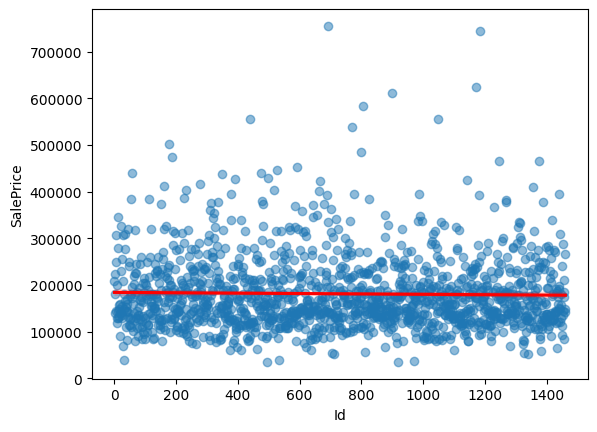

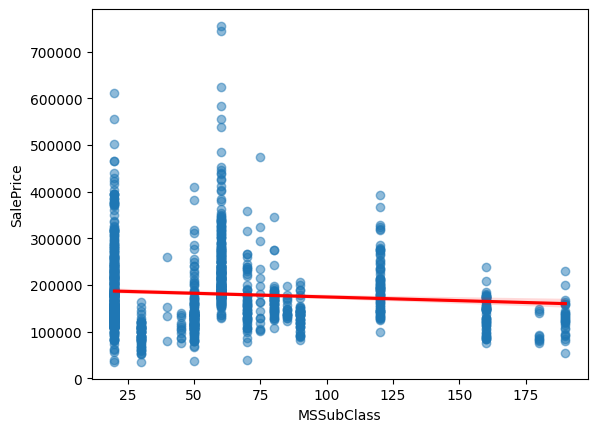

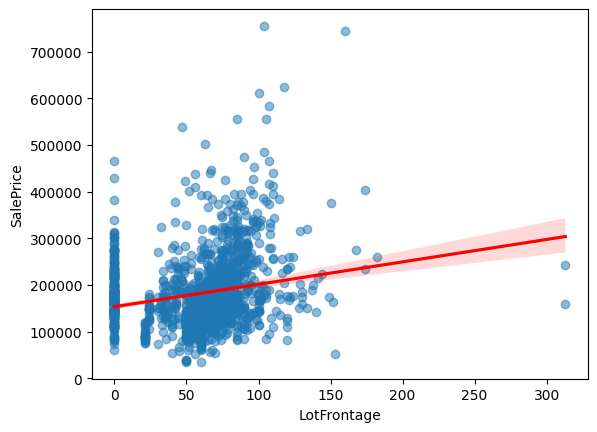

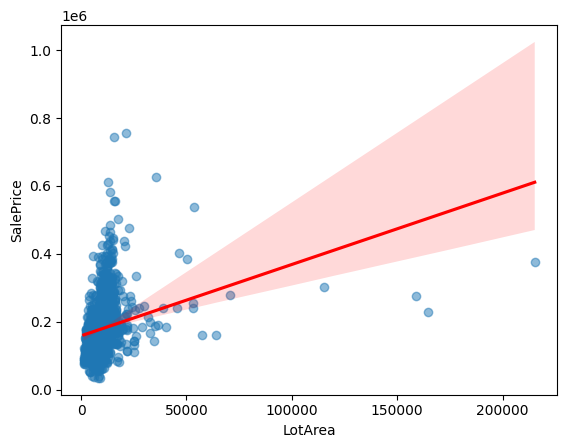

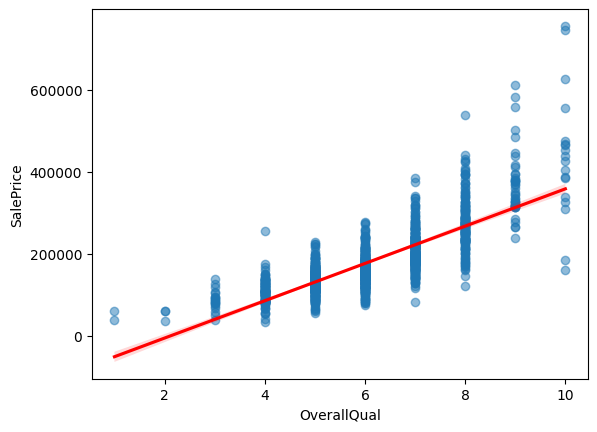

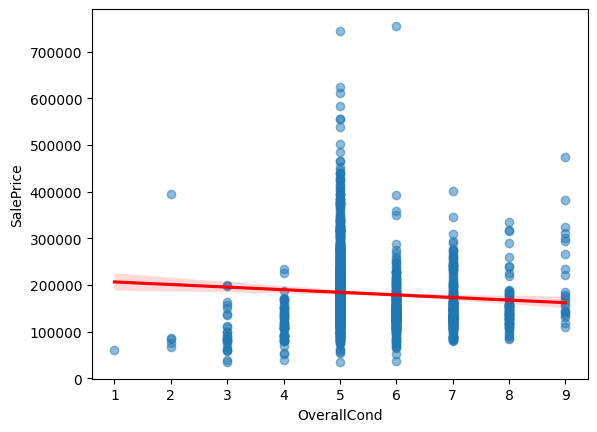

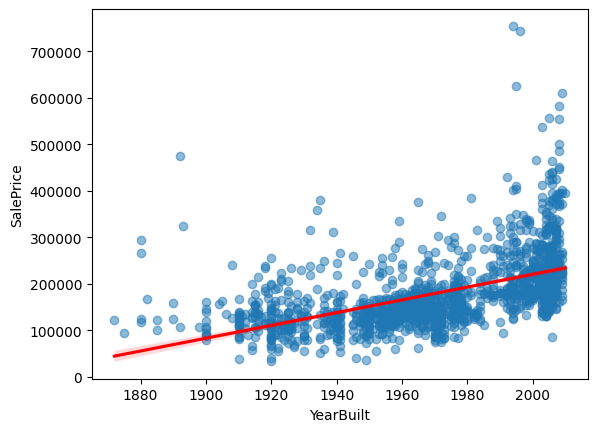

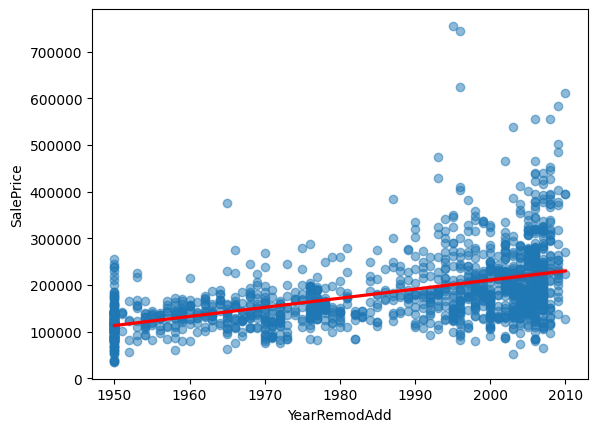

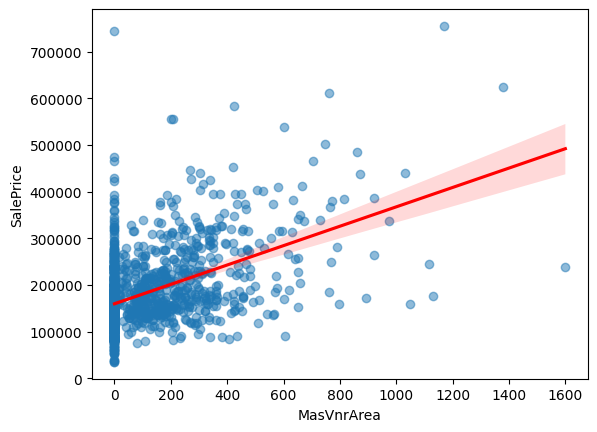

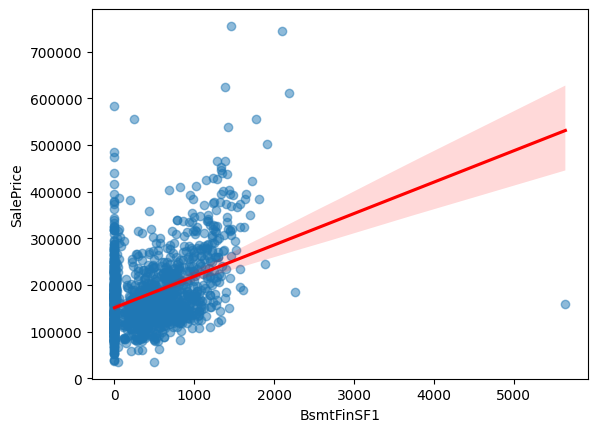

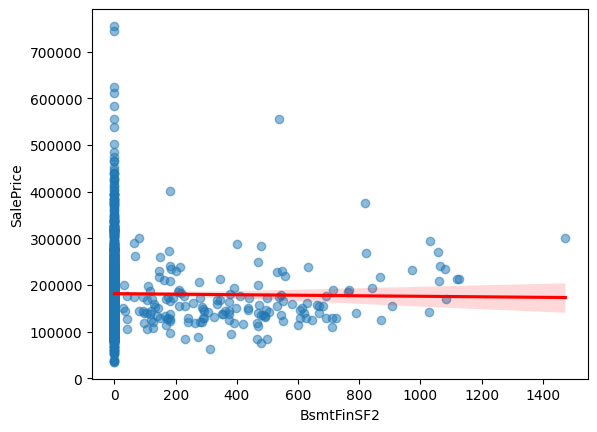

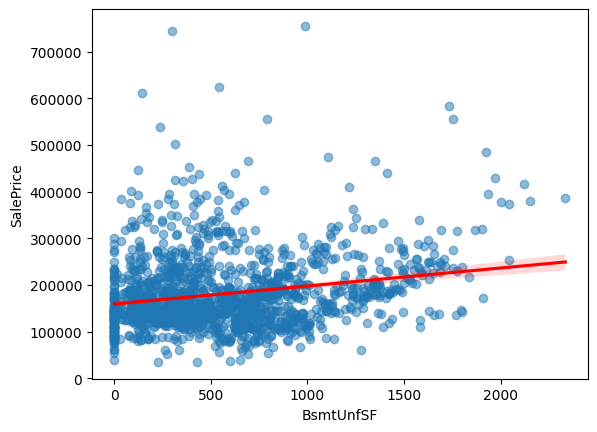

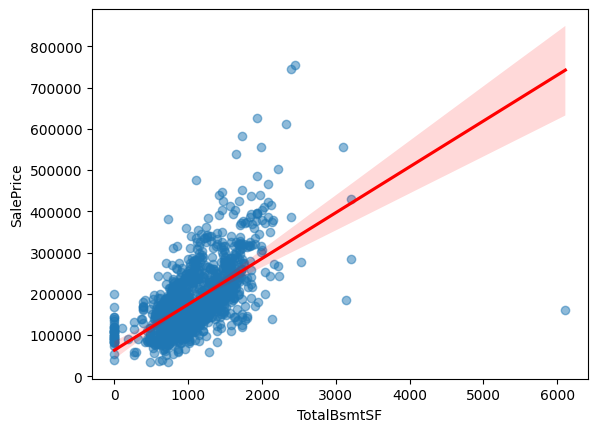

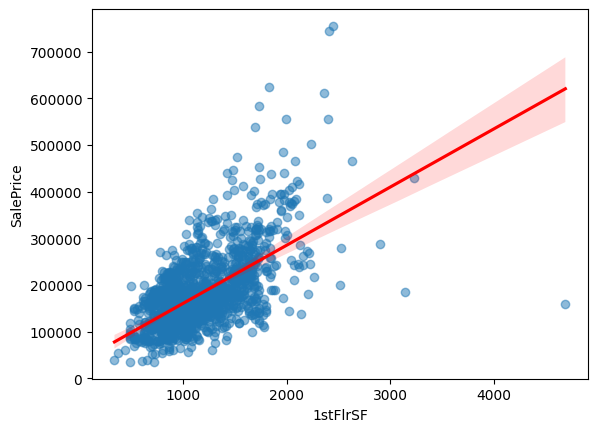

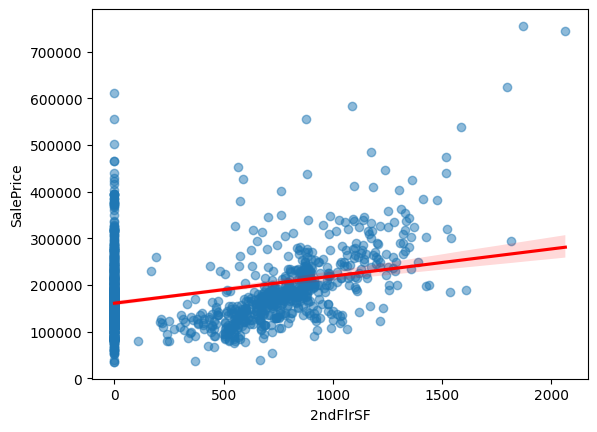

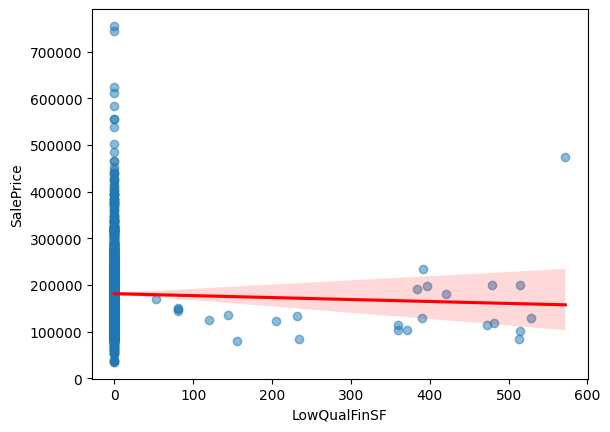

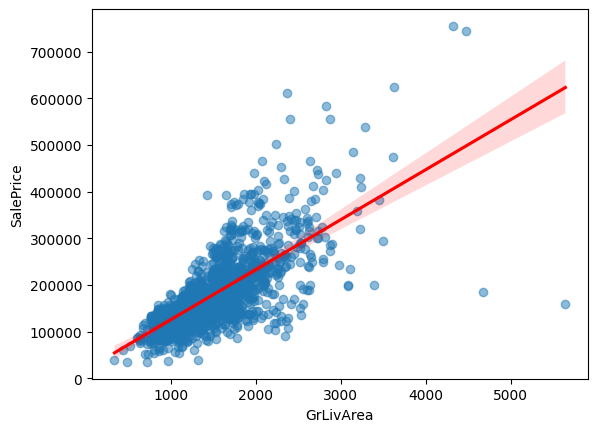

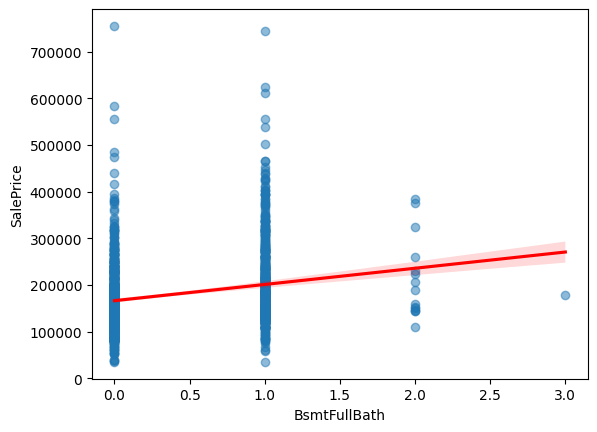

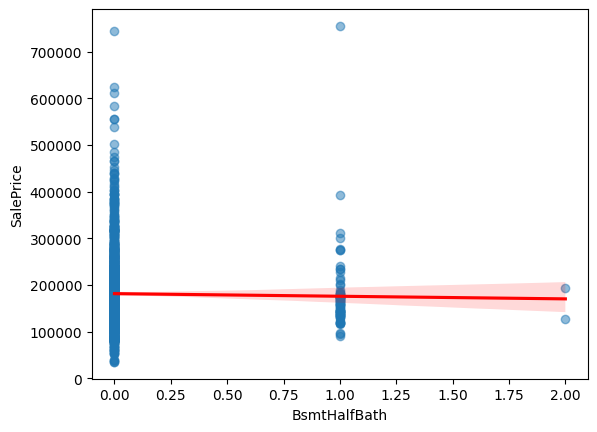

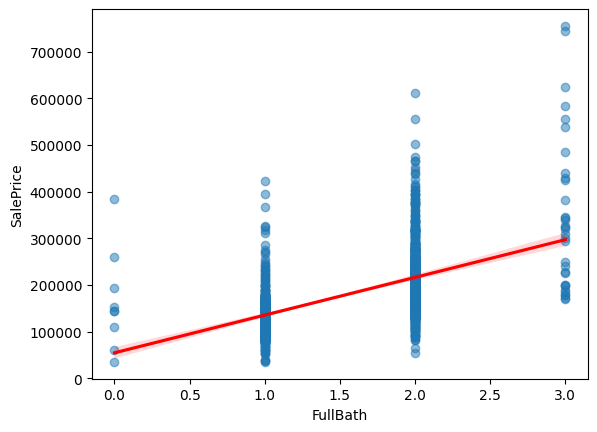

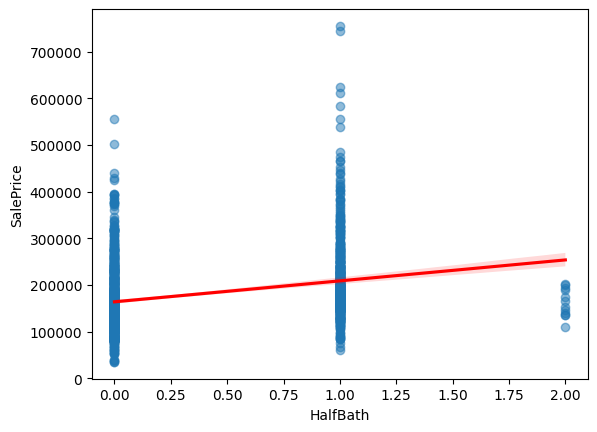

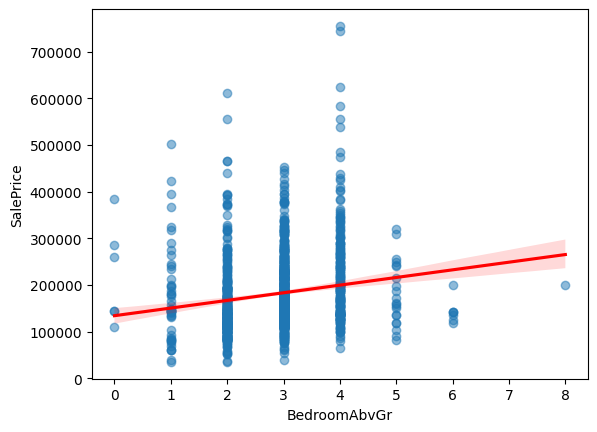

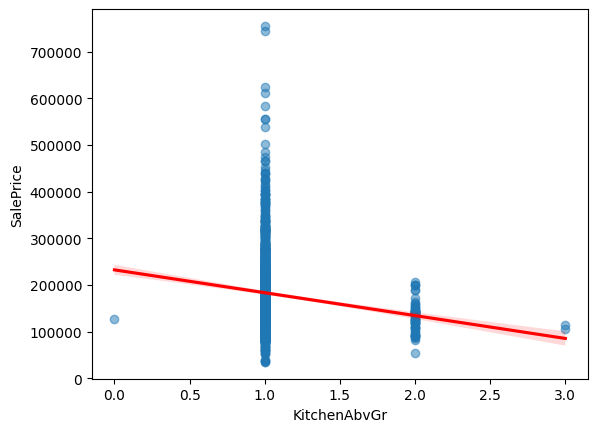

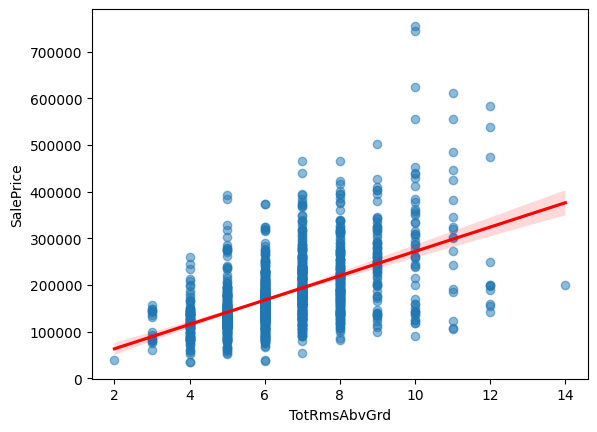

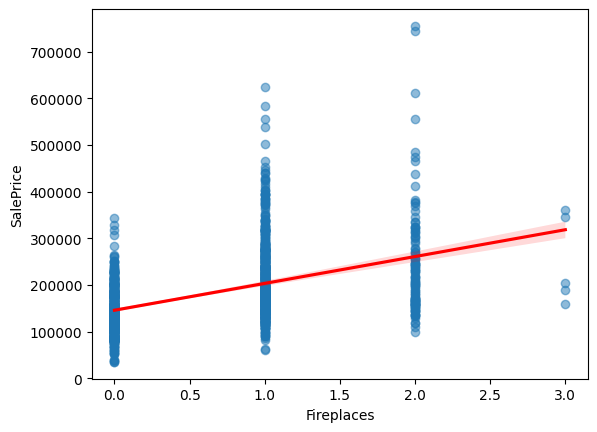

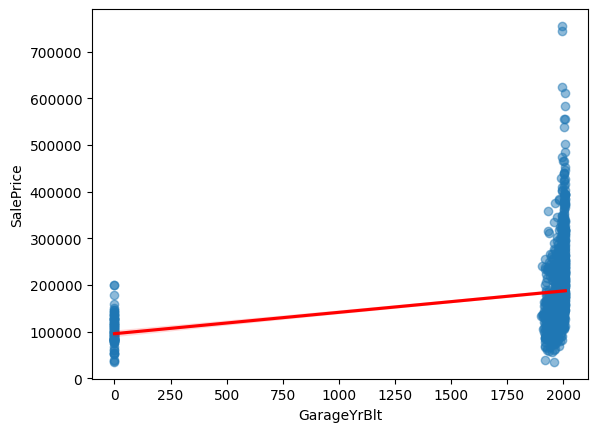

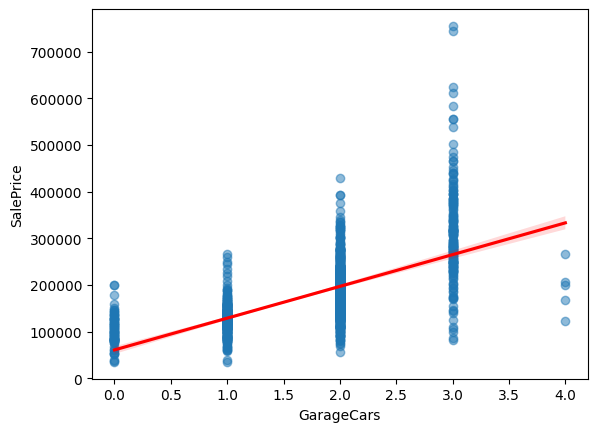

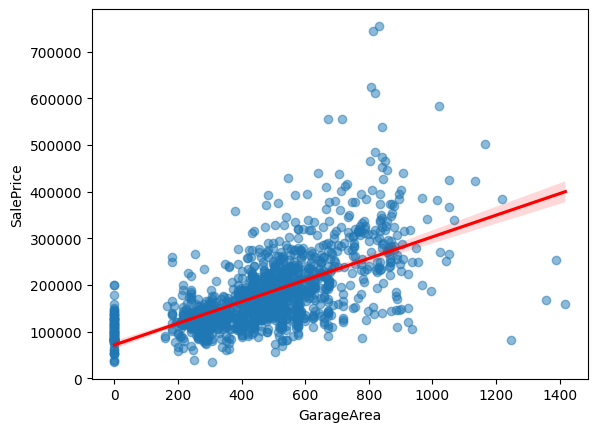

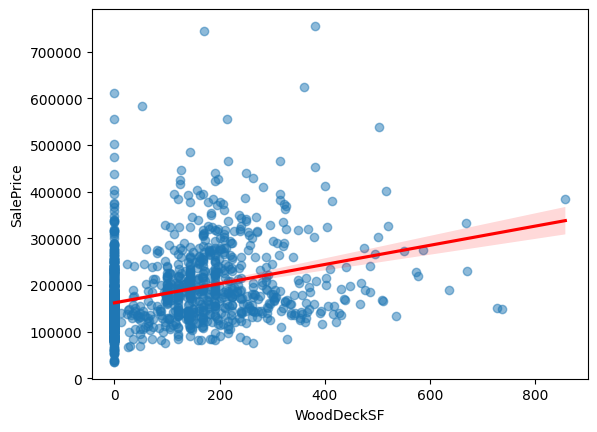

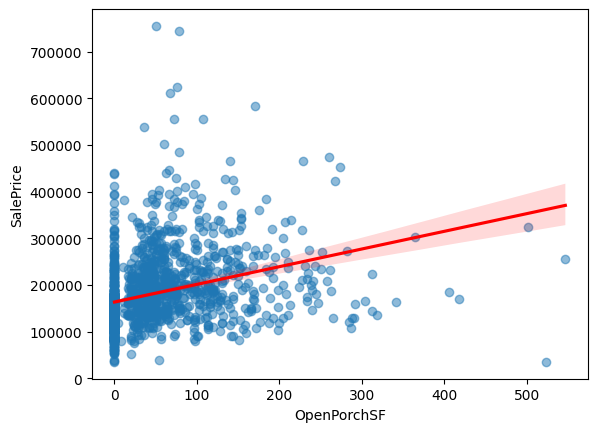

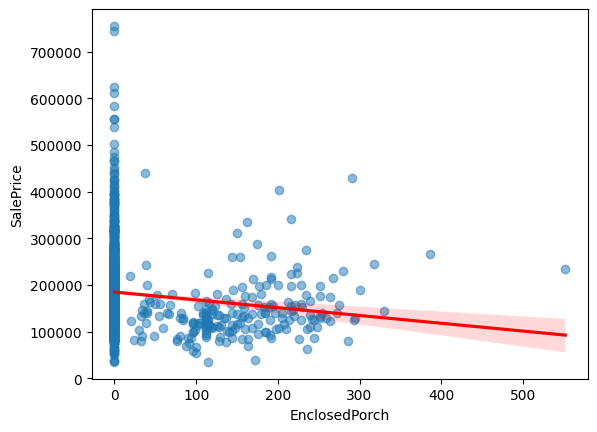

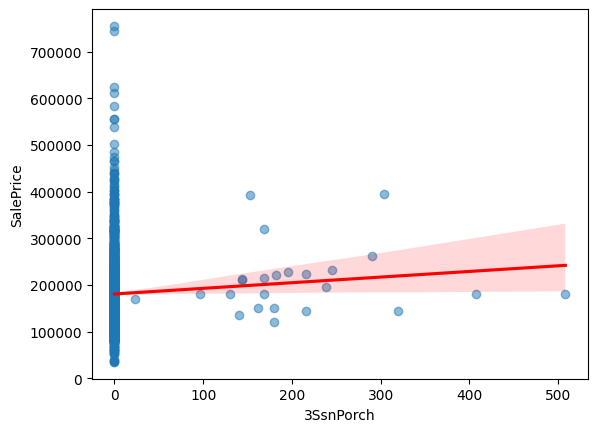

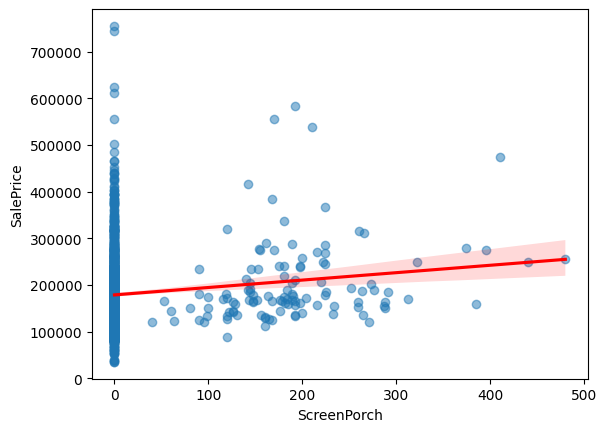

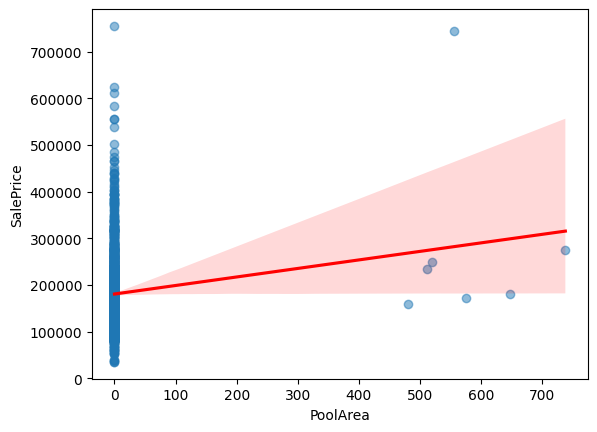

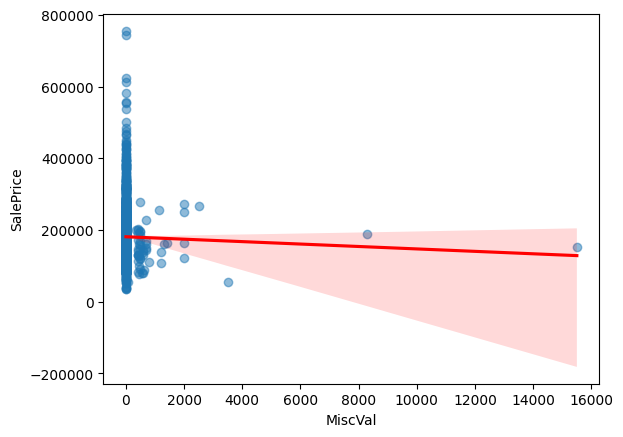

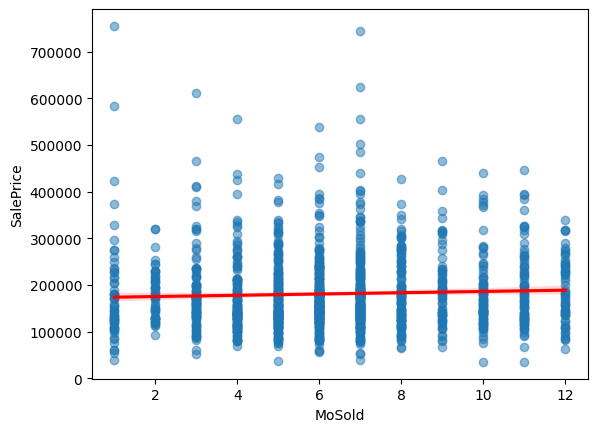

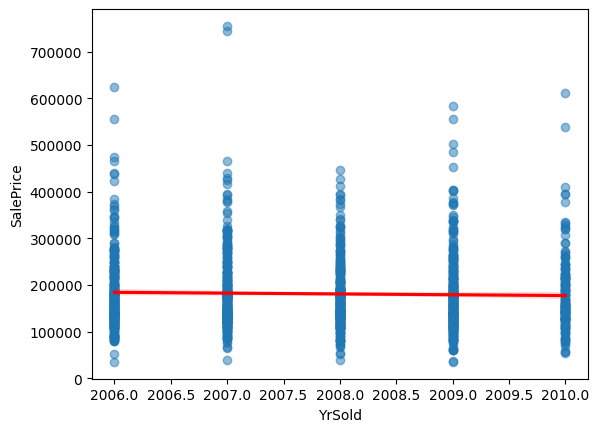

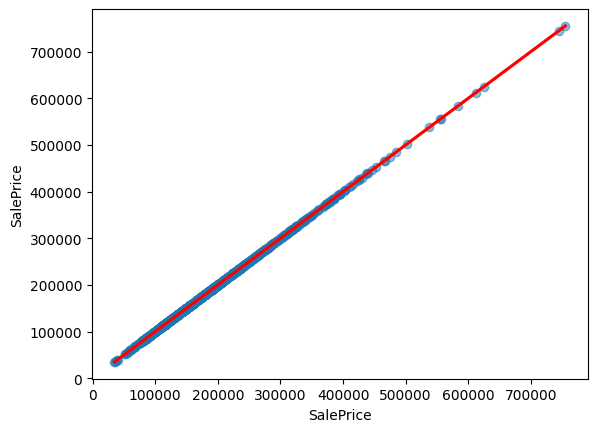

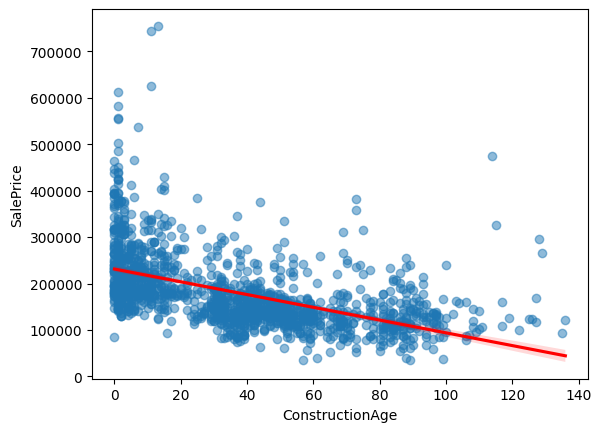

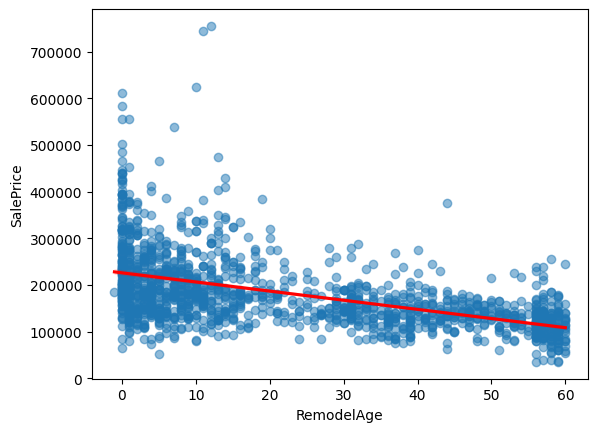

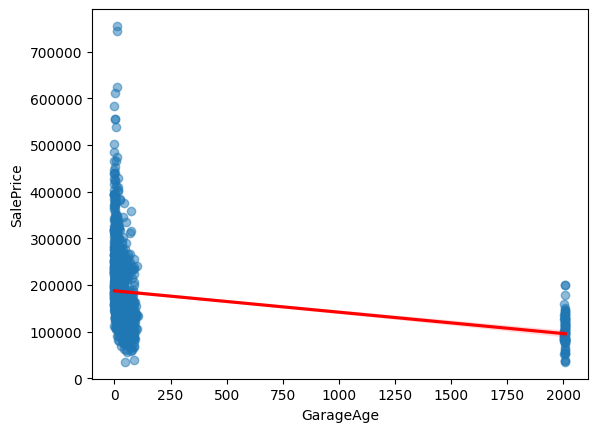

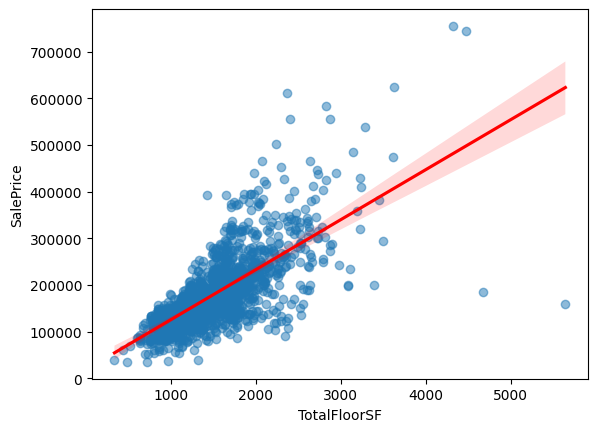

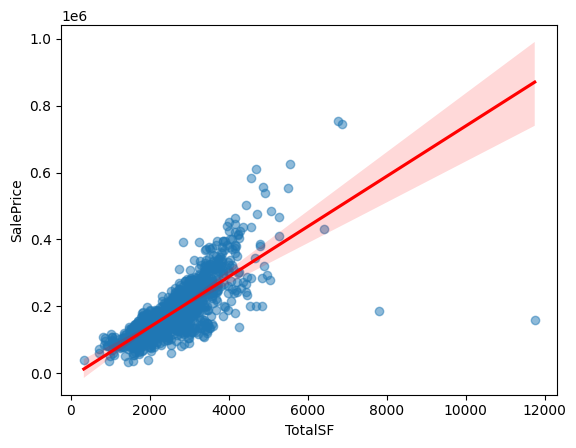

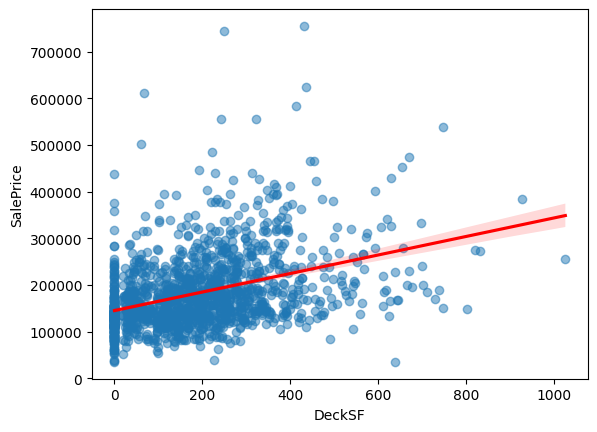

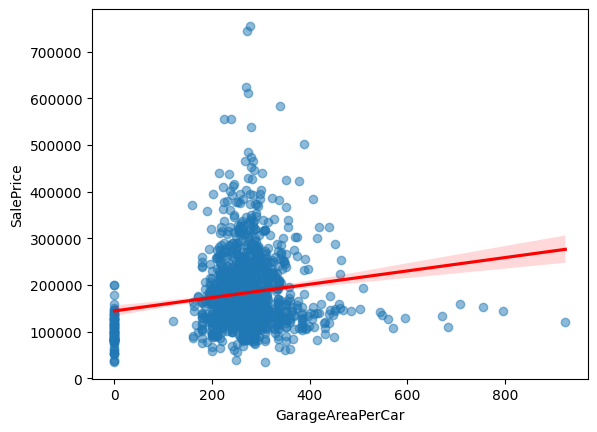

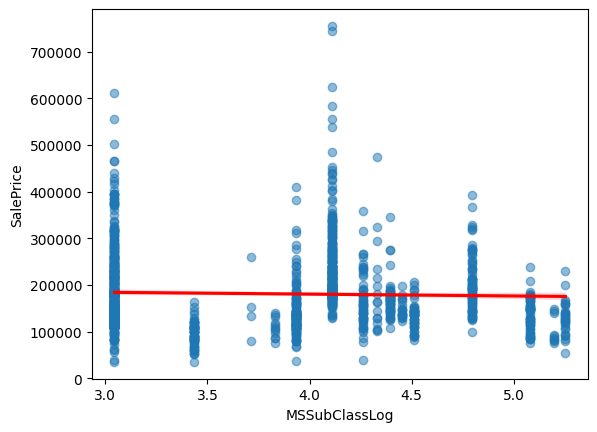

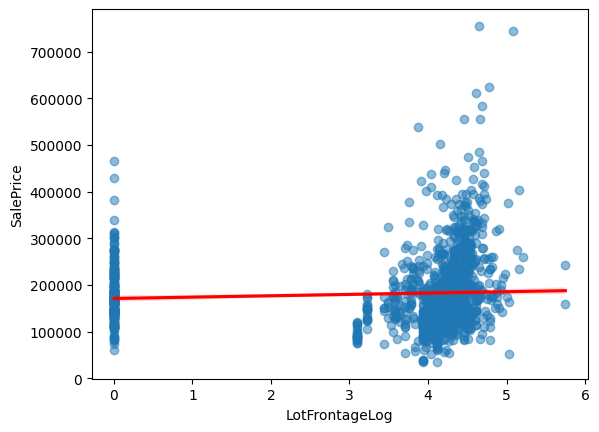

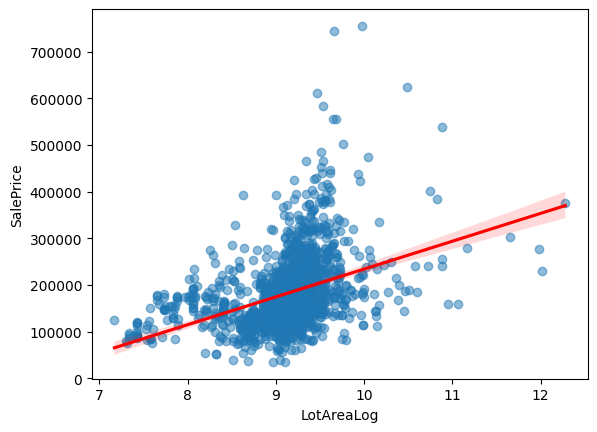

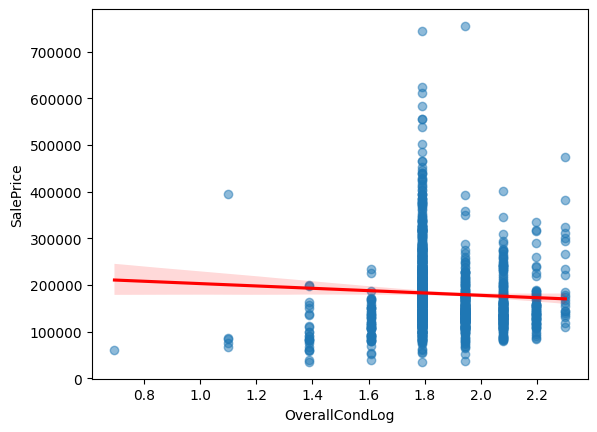

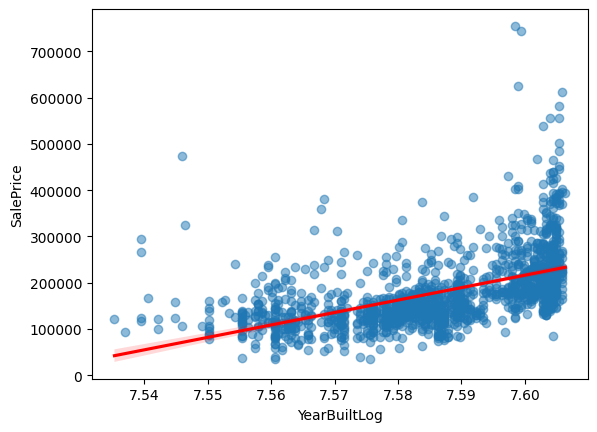

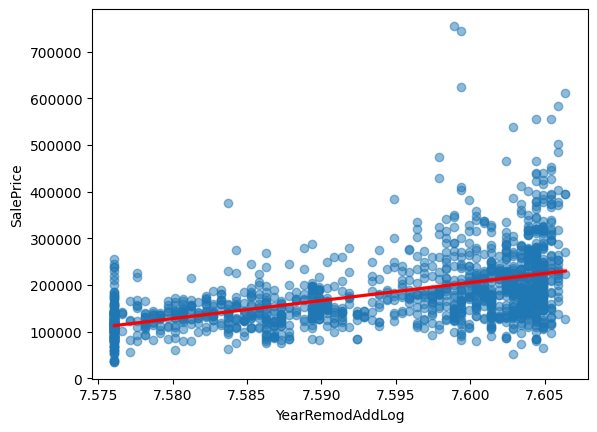

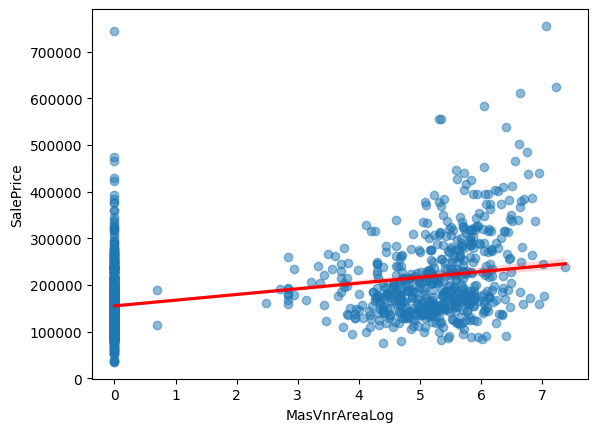

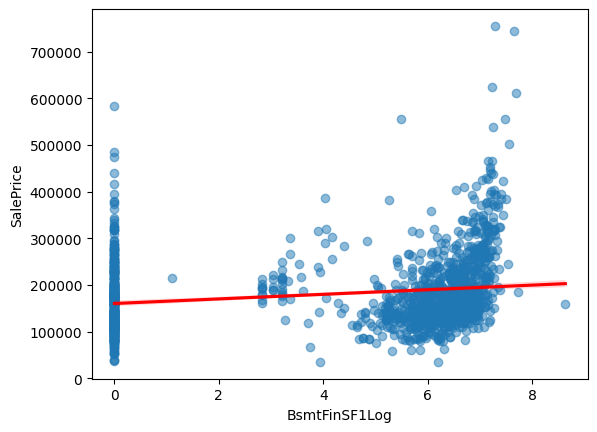

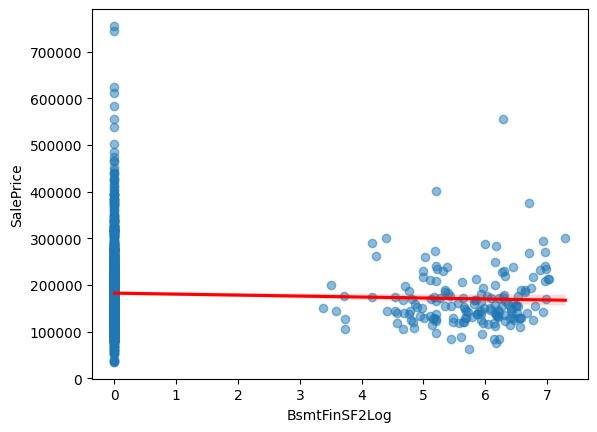

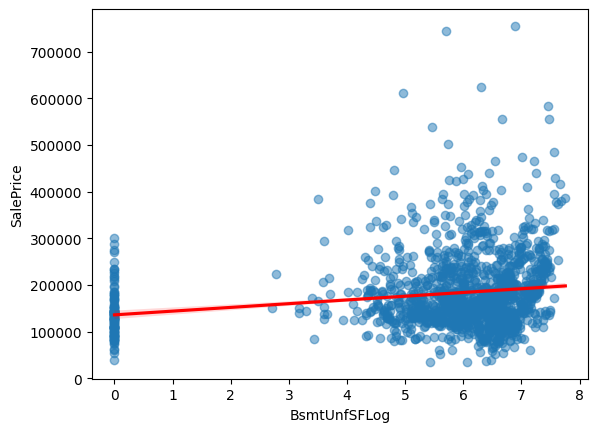

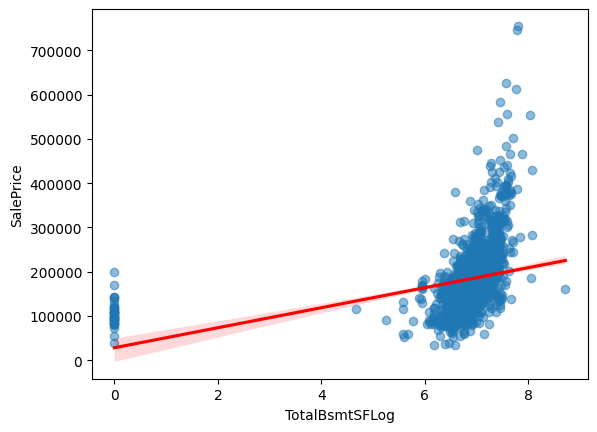

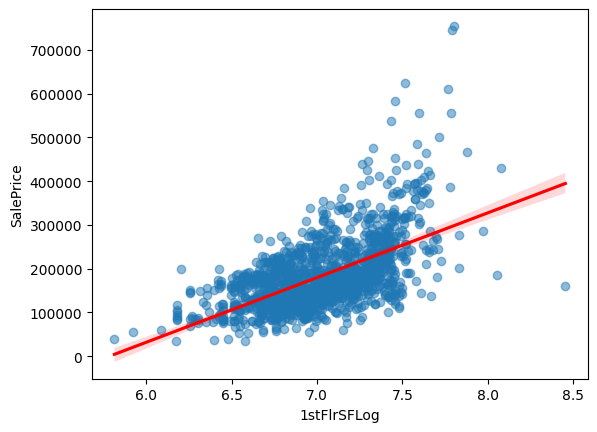

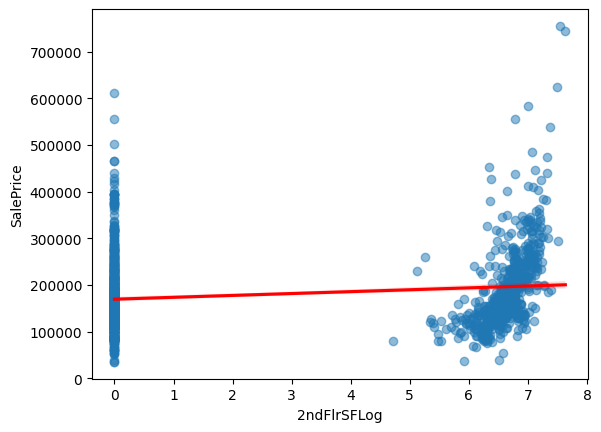

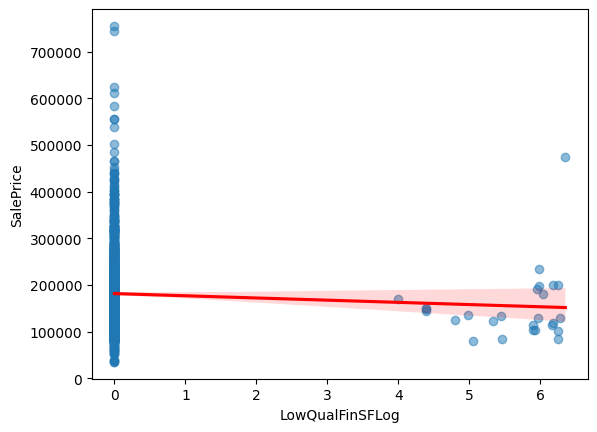

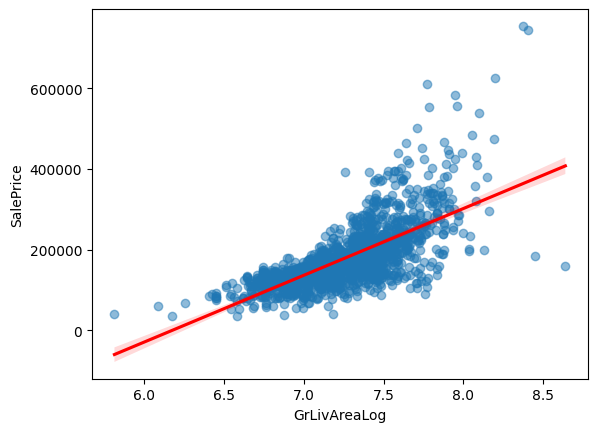

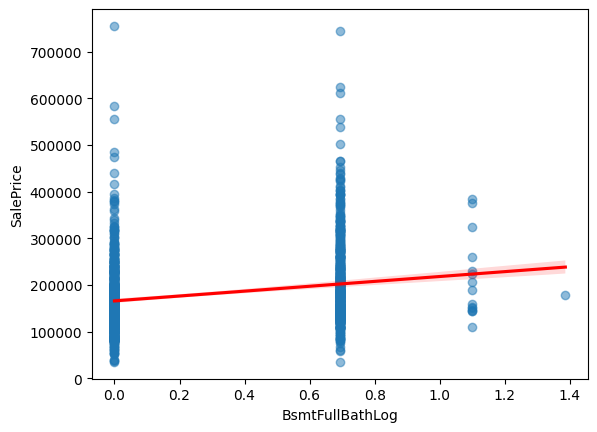

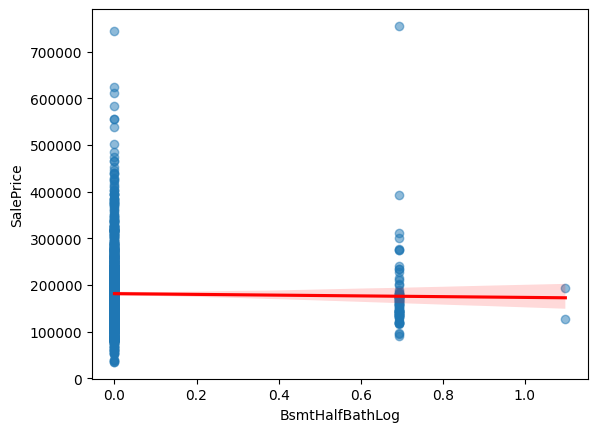

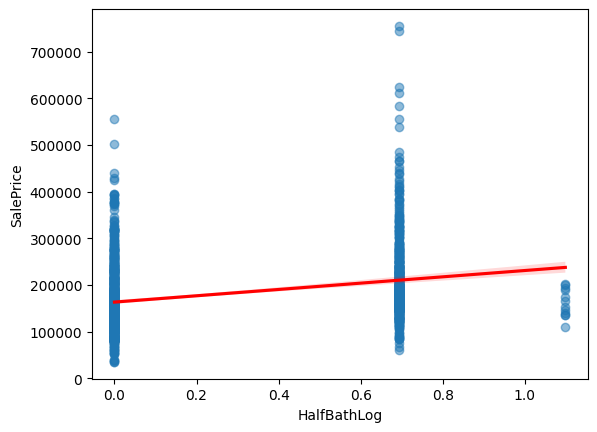

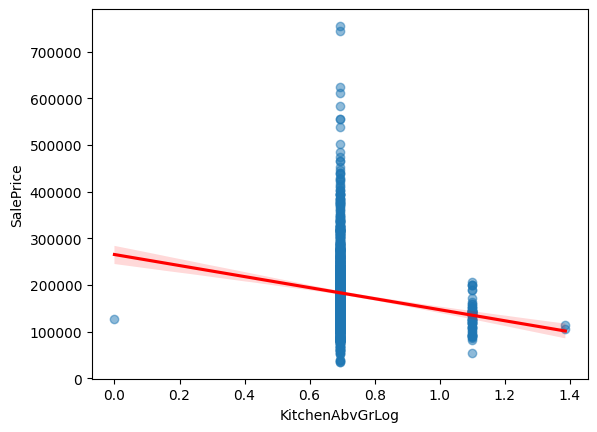

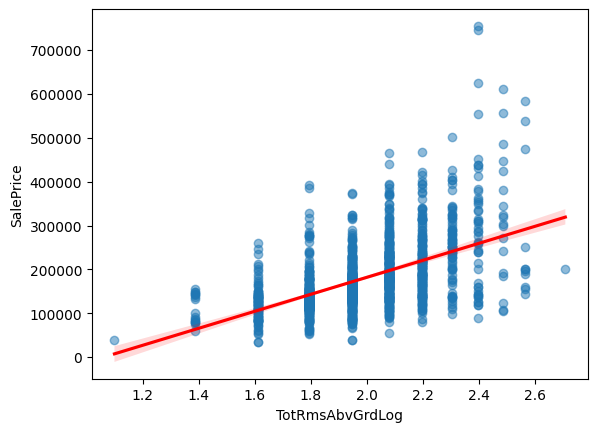

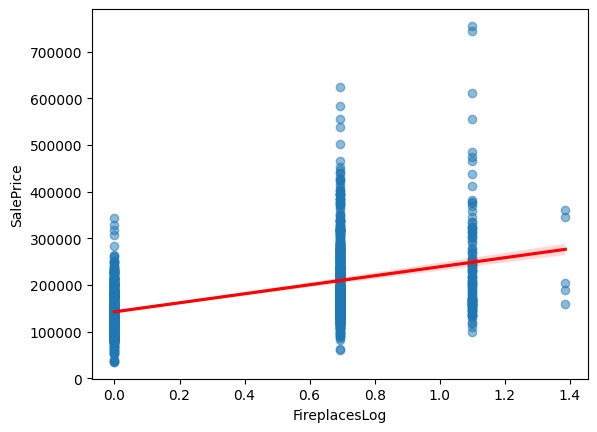

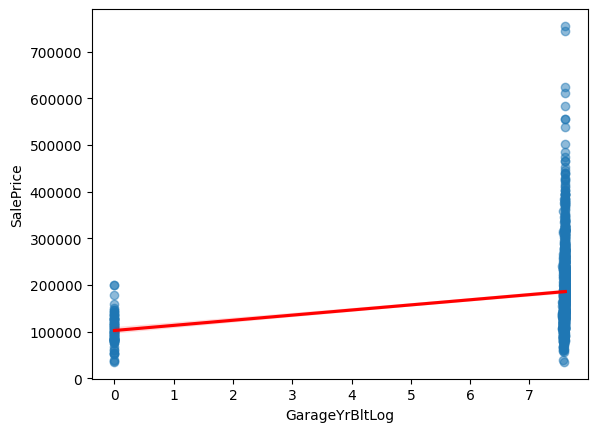

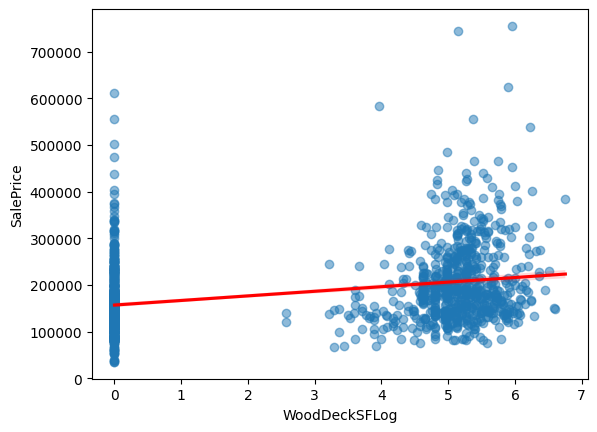

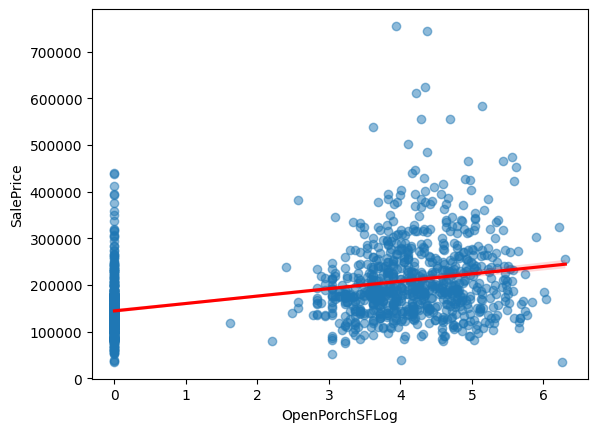

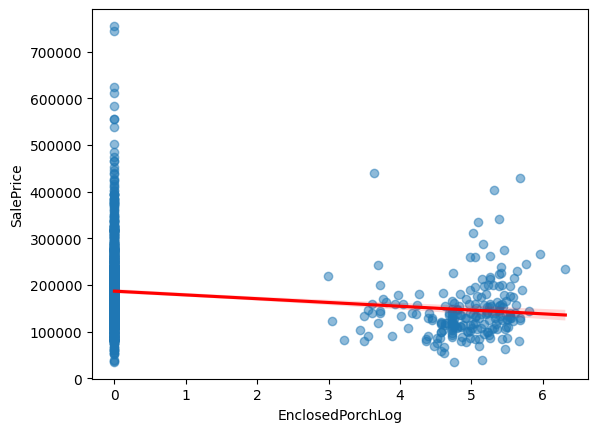

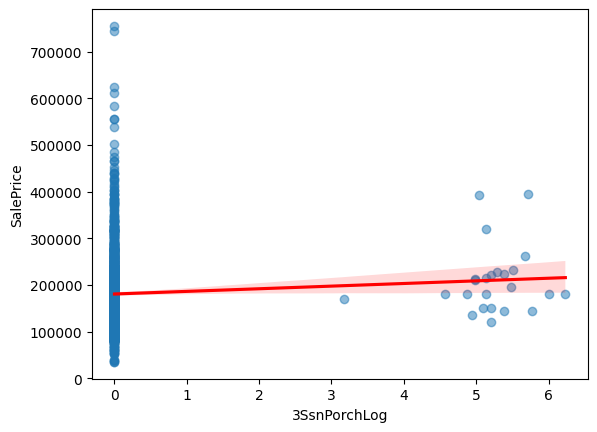

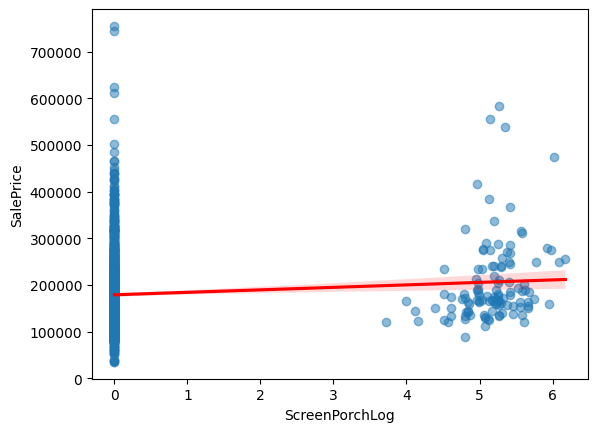

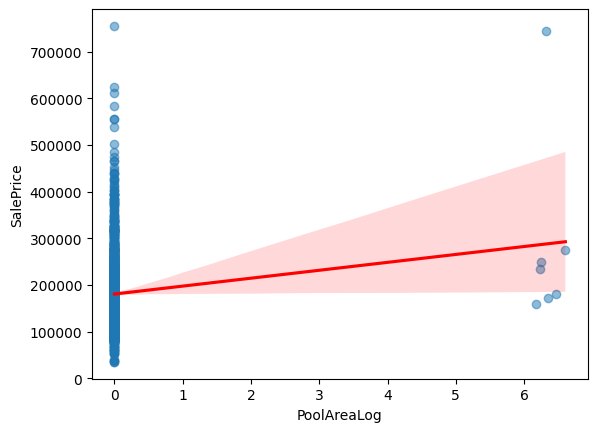

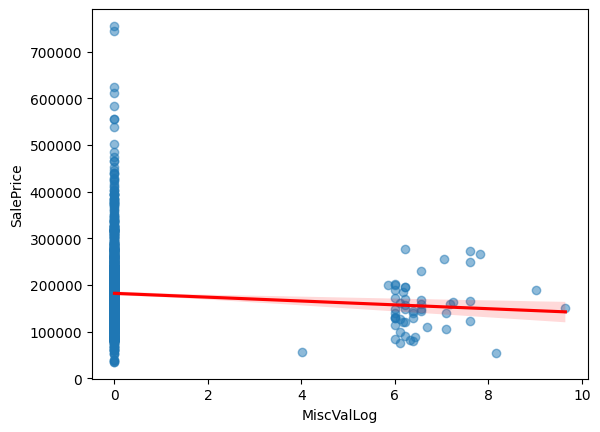

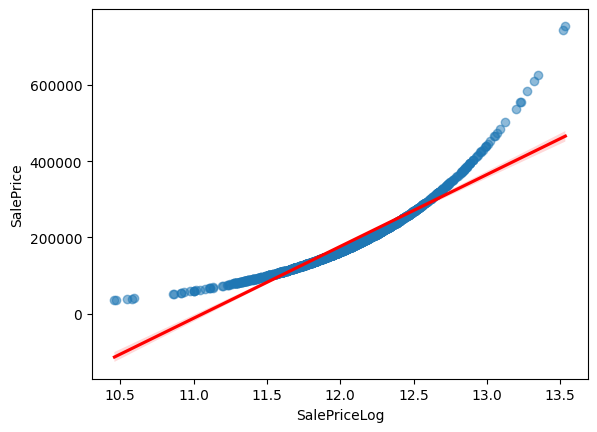

In [28]:
for col in updated_numerical_cols:
    sns.regplot(x=col, y='SalePrice', data=vf_train, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.show()

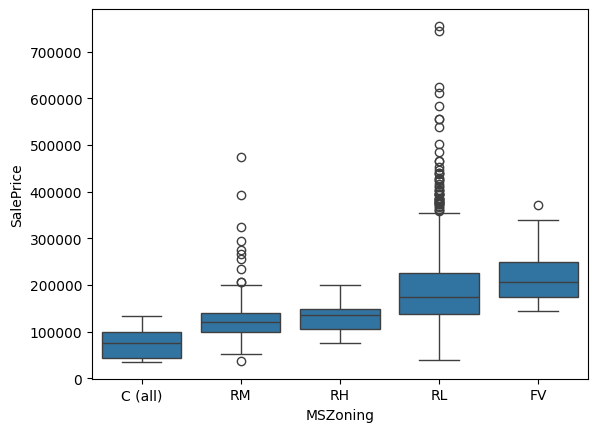

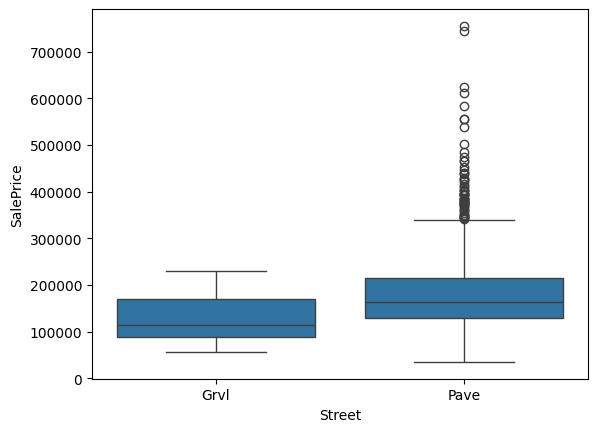

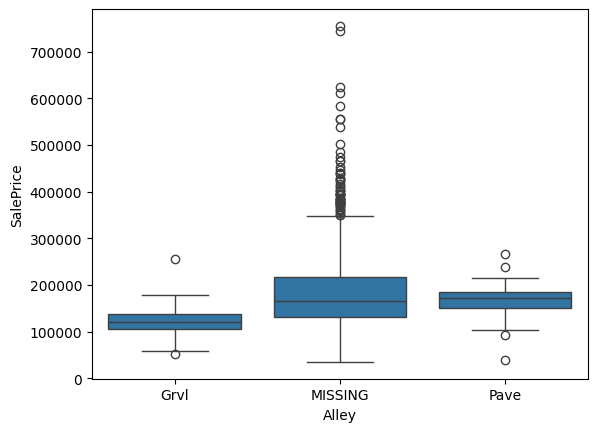

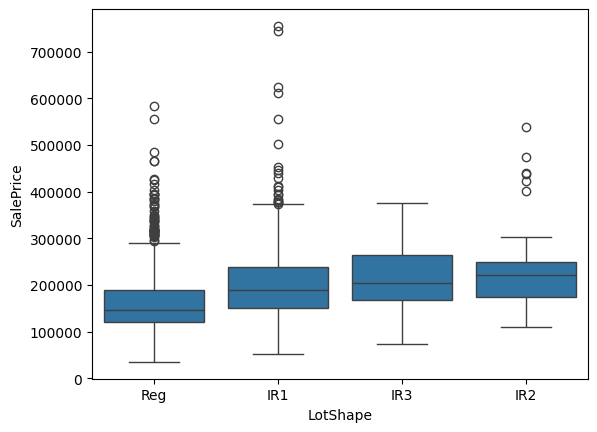

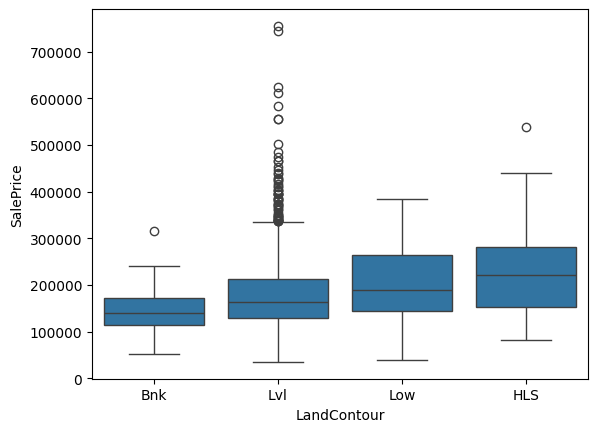

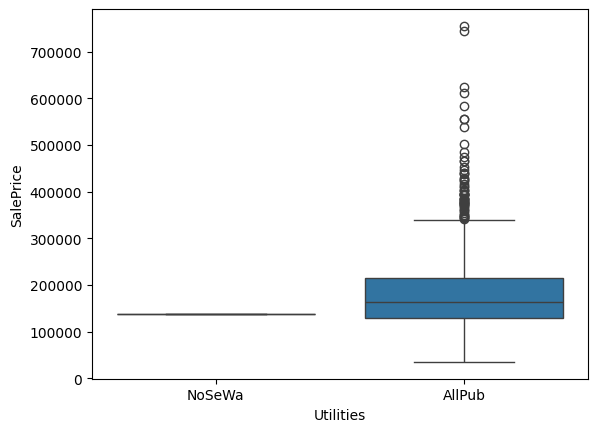

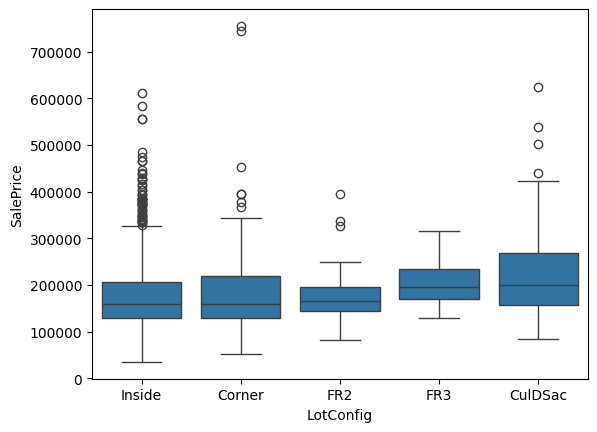

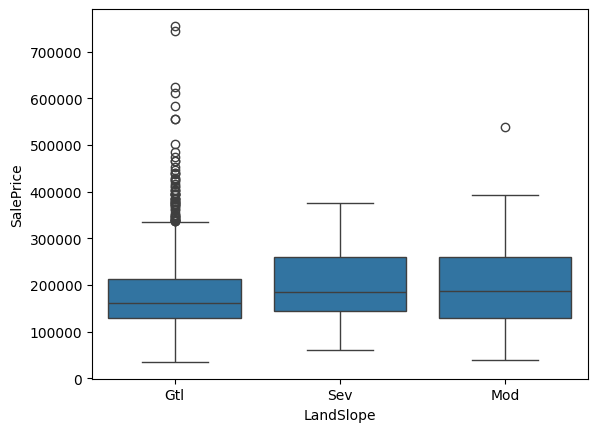

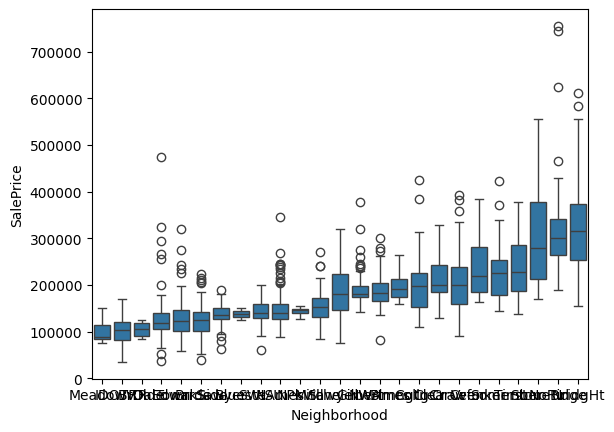

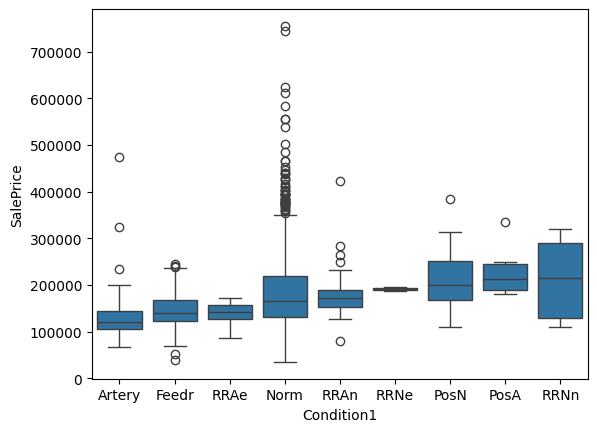

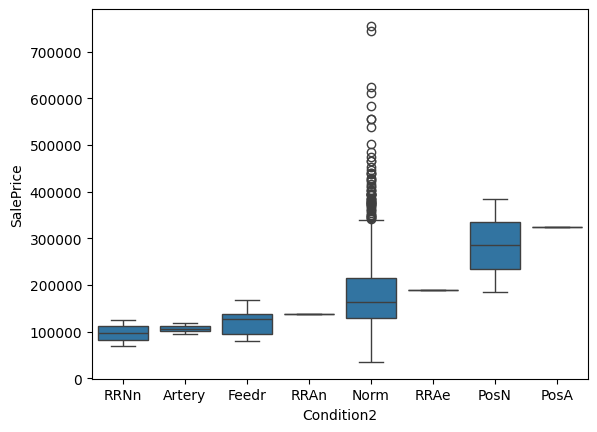

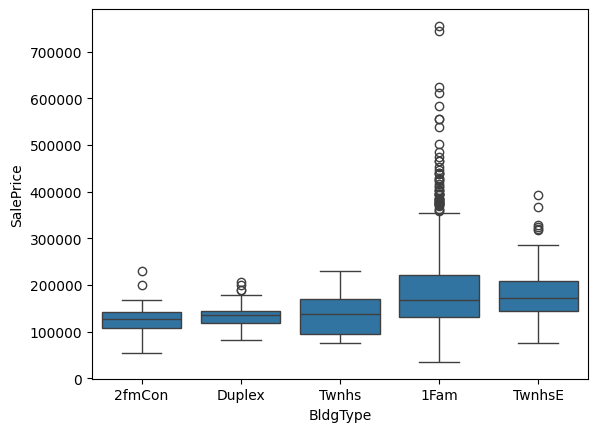

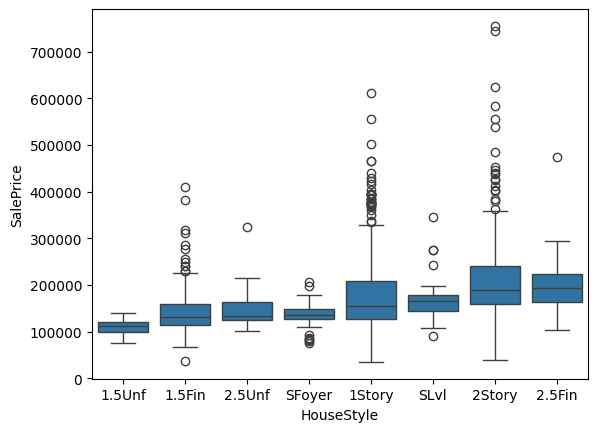

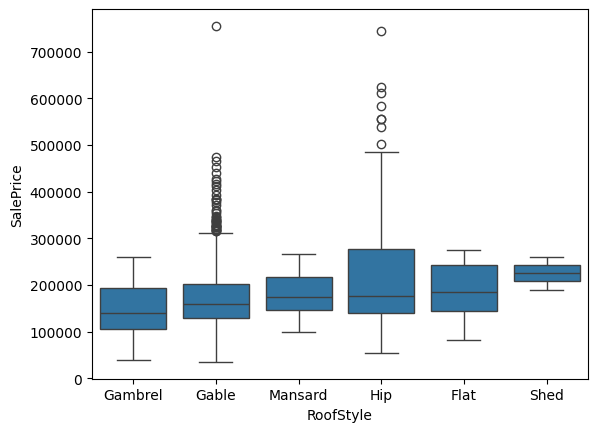

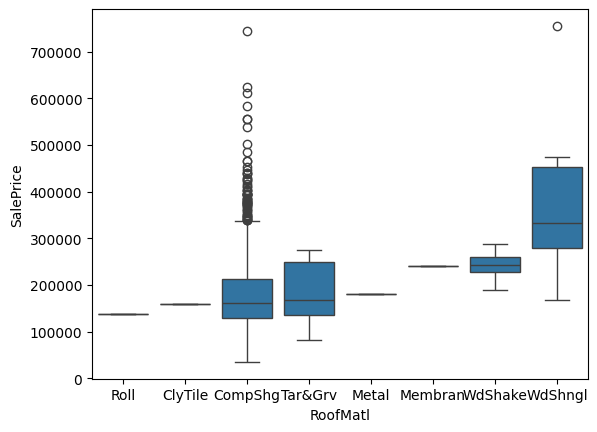

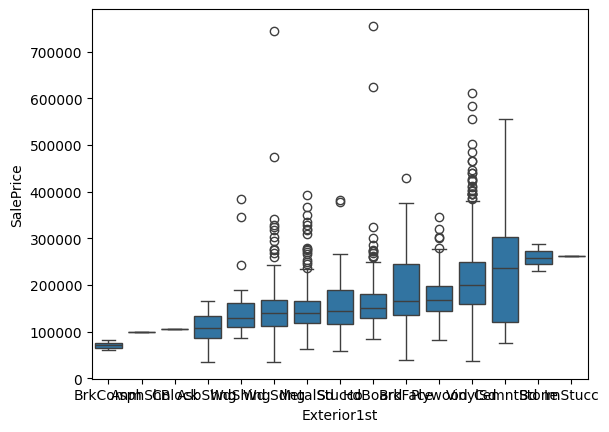

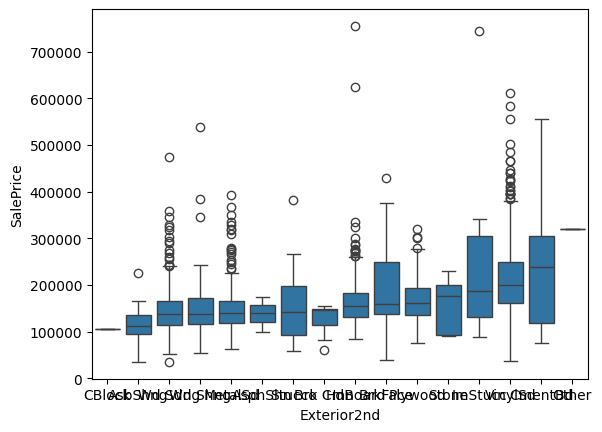

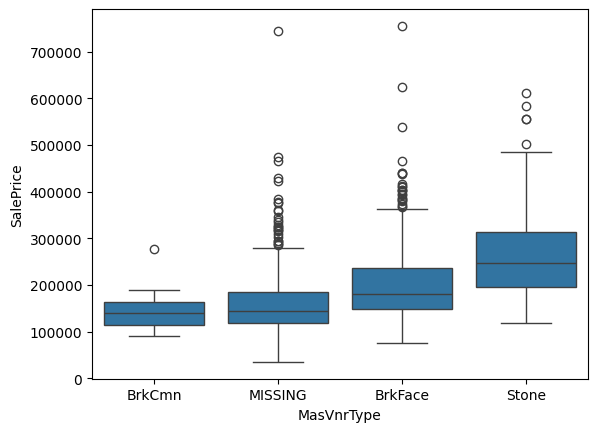

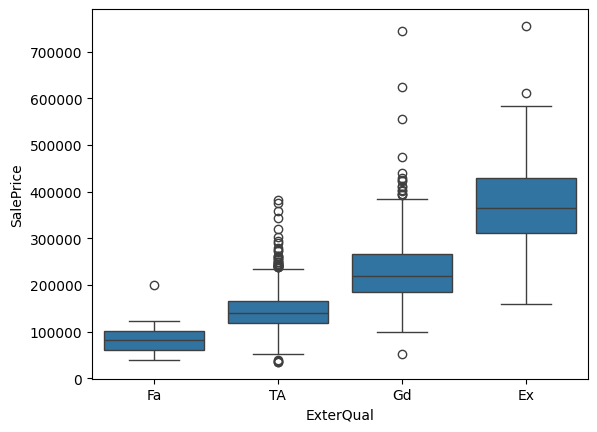

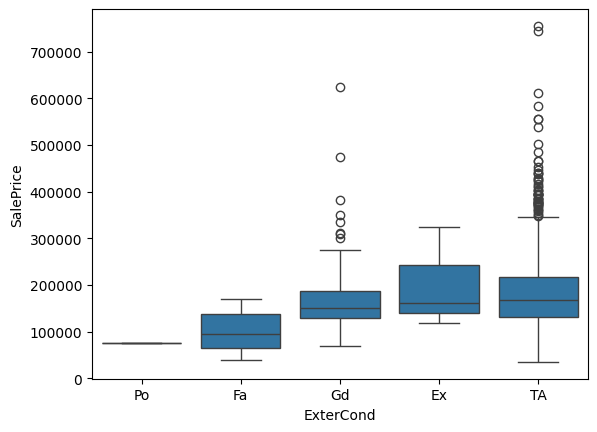

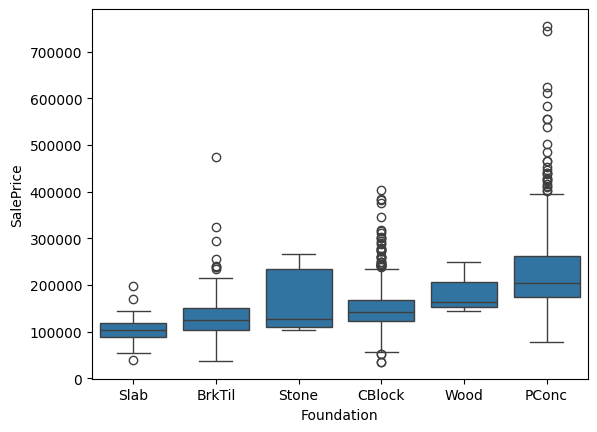

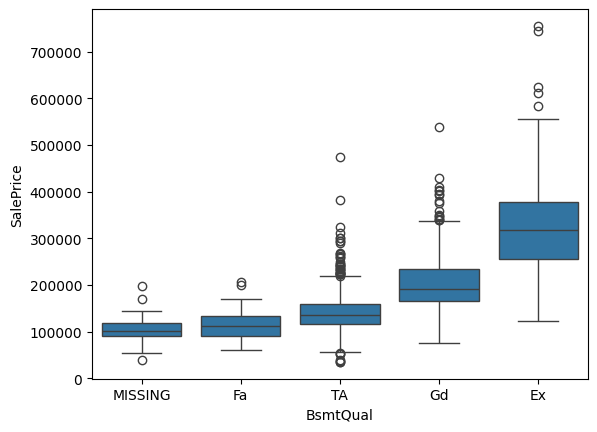

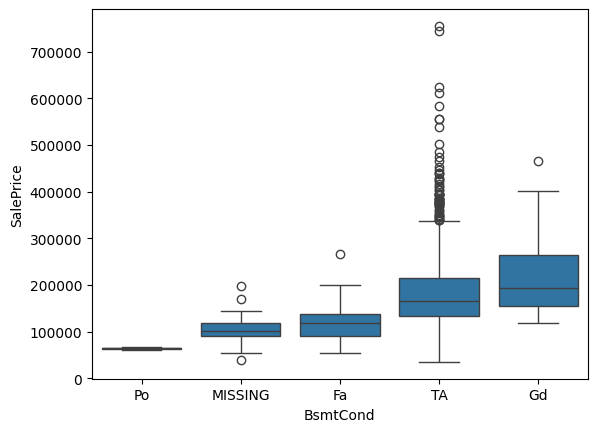

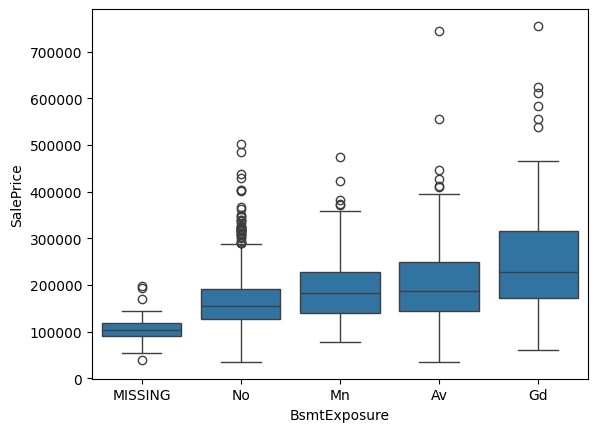

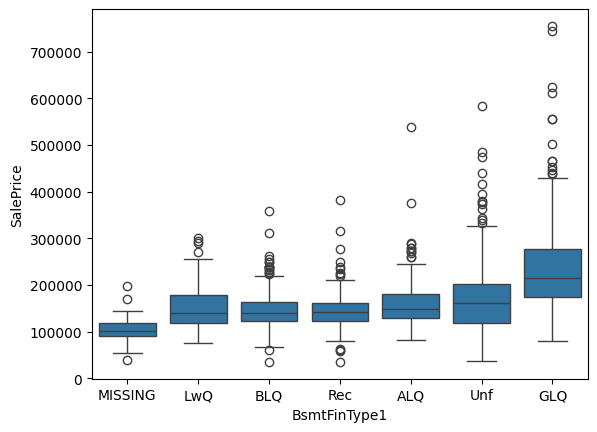

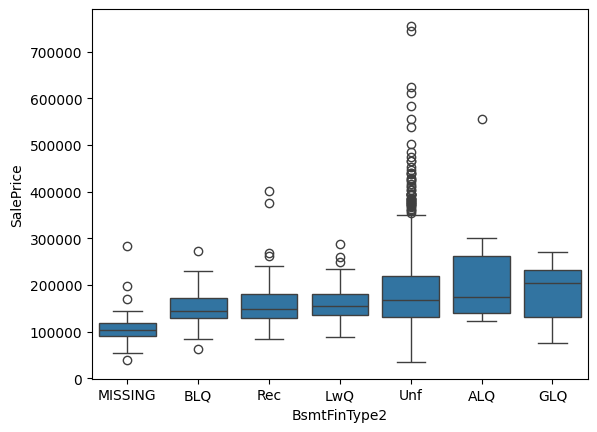

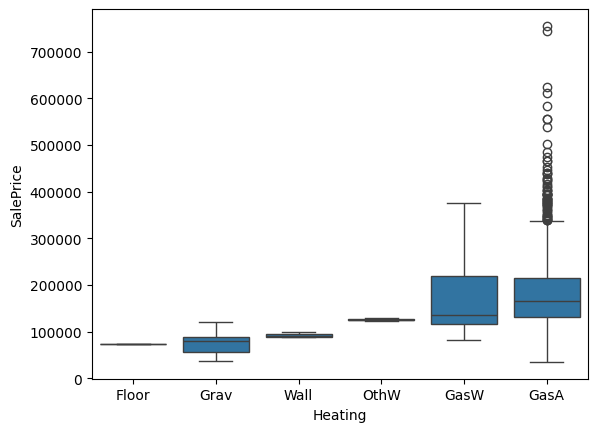

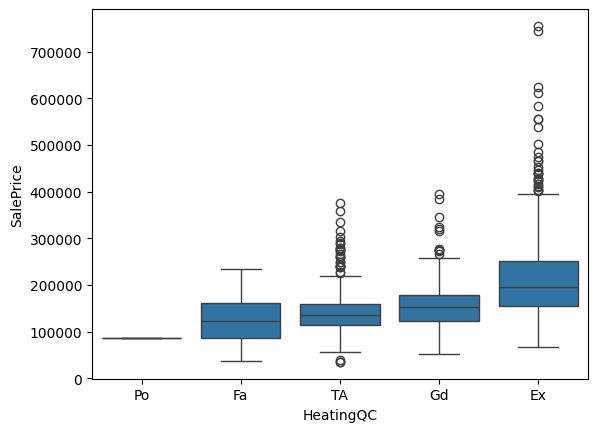

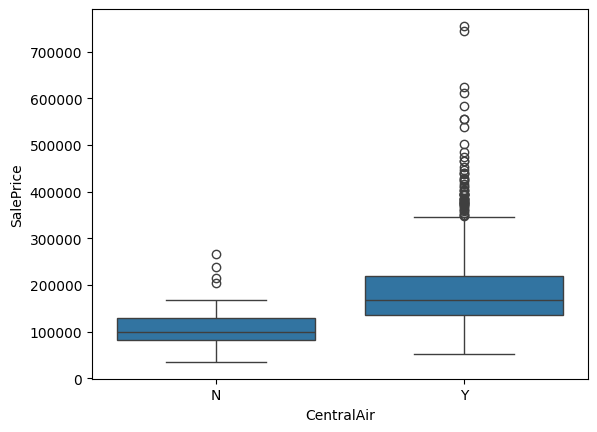

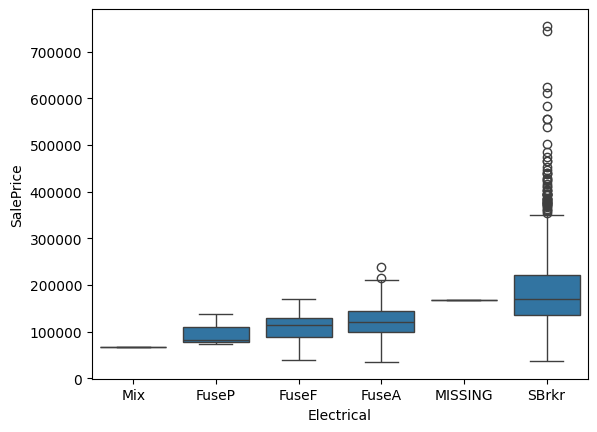

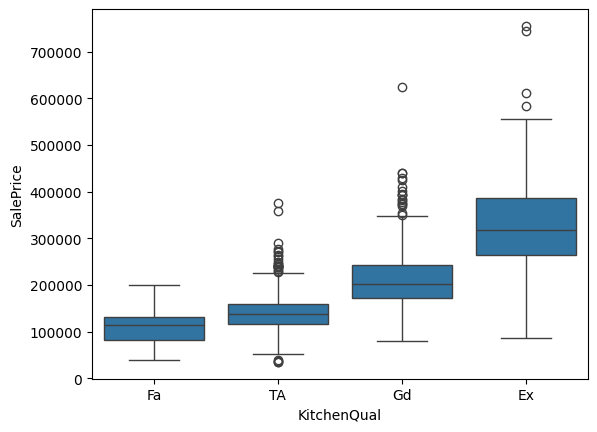

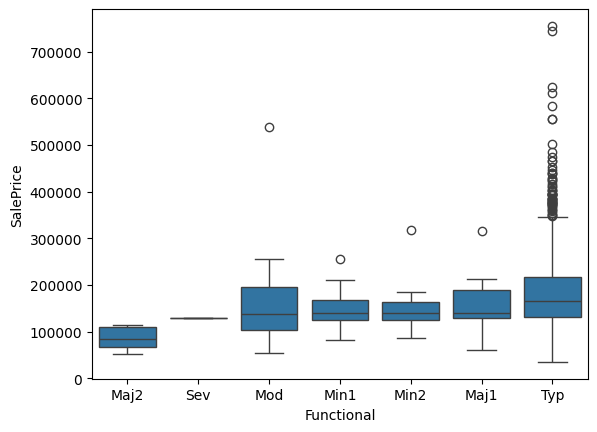

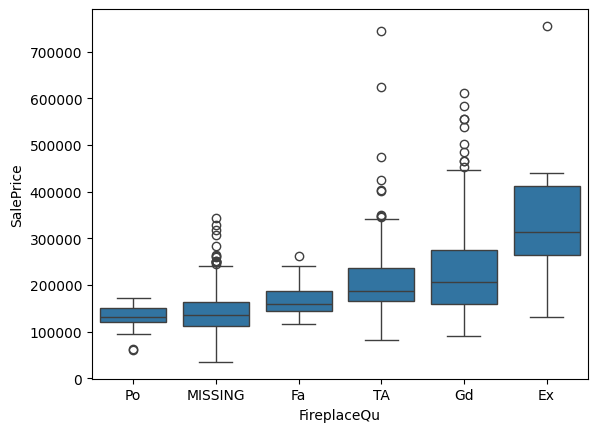

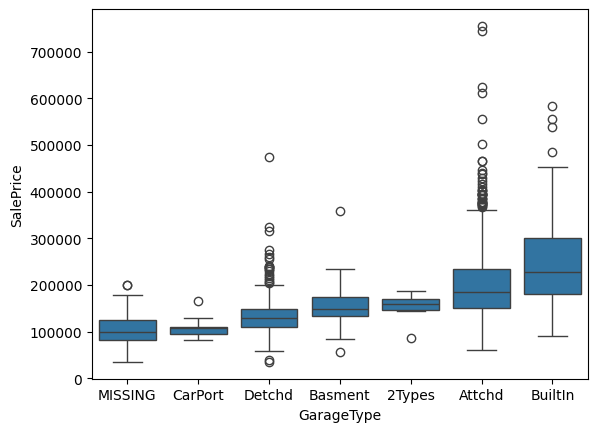

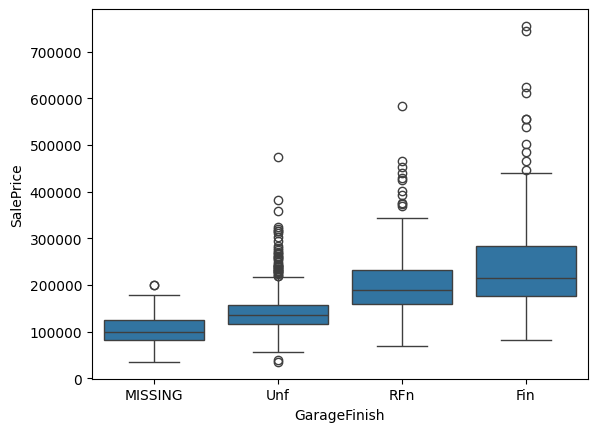

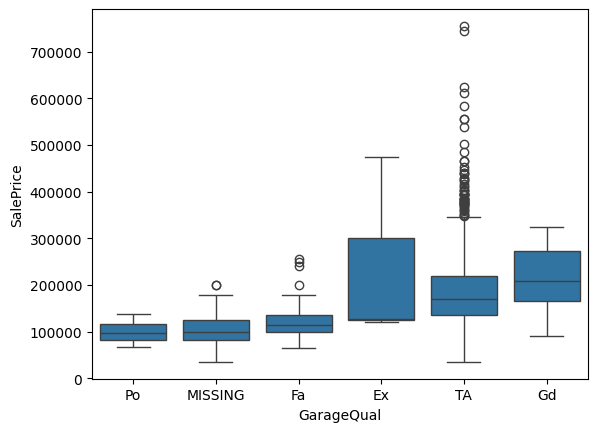

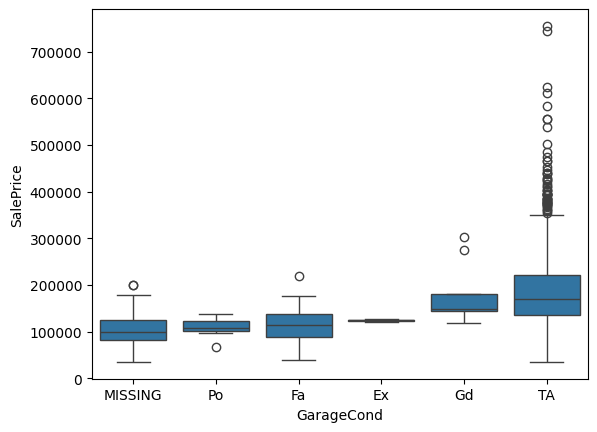

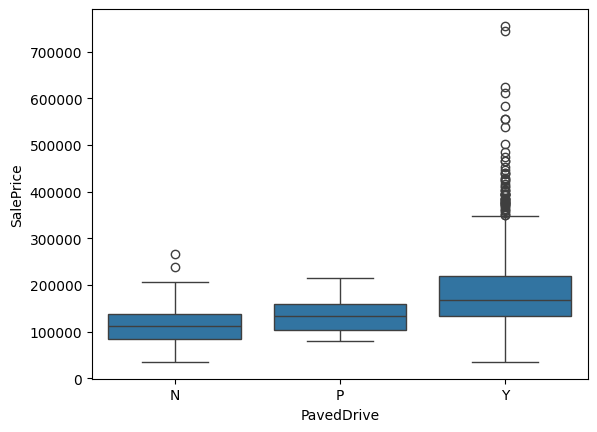

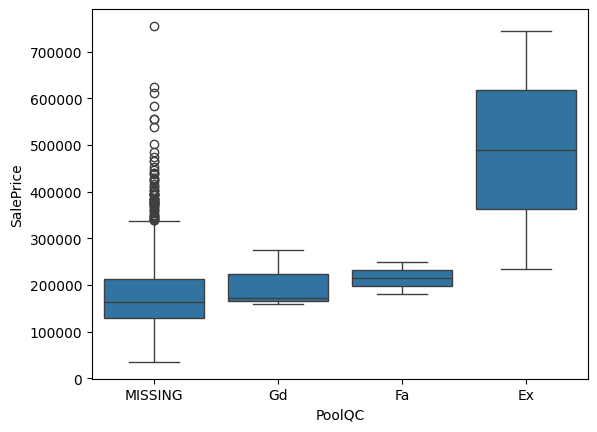

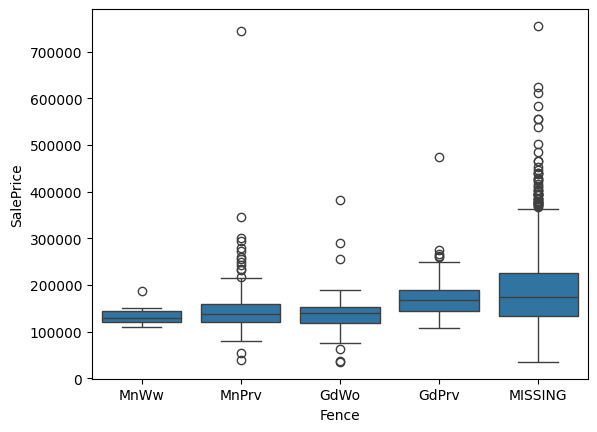

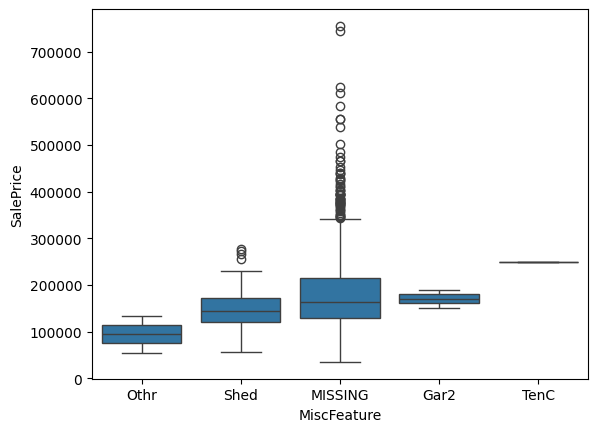

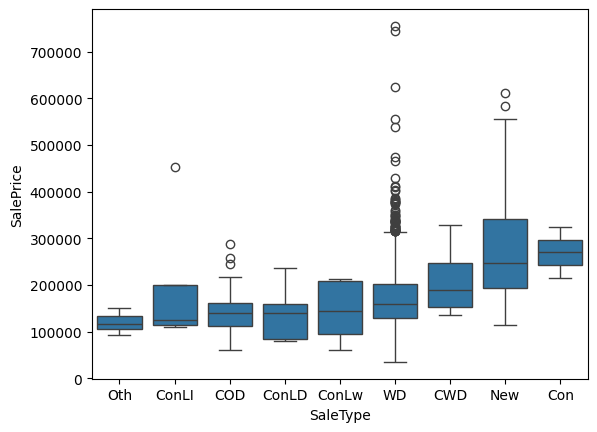

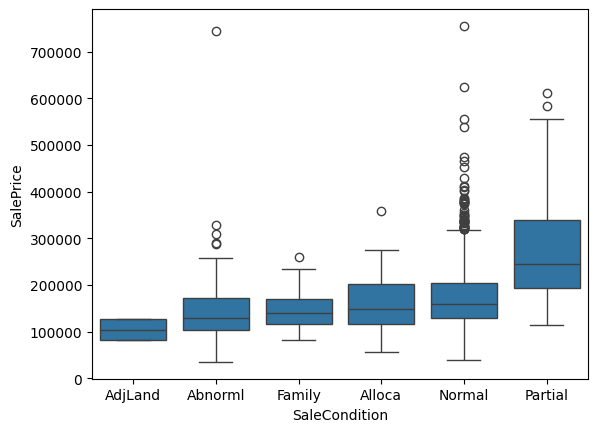

In [29]:
for col in updated_category_cols:
    sorted_categories = vf_train.groupby(col)['SalePrice'].median().sort_values().index
    
    sns.boxplot(data=vf_train, x=col, y='SalePrice', order=sorted_categories)
    plt.show()

### Label Encoding

In [30]:
label_encoders = {}

for col in category_cols:
    df_col = pd.concat([vf_train[col], vf_test[col]], ignore_index=True)
    le = LabelEncoder()
    le.fit(df_col)
    label_encoders[col] = le
    vf_train[col] = le.transform(vf_train[col])
    vf_test[col] = le.transform(vf_test[col])
    
display(vf_train.head(3))
display(vf_test.head(3))

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         4         65.0     8450       1      1         3   
1   2          20         4         80.0     9600       1      1         3   
2   3          60         4         68.0    11250       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           13           14           1   
1          1976          1         1            9            9           2   
2          2002          1         1           13           14           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         4   
1         0.0          3          4           1         2         4   
2       162.0          2          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             2         706             6           0   
1             1             0         978             6           0   
2             3             2         486             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           5   
1        284         1262        1          0           1           5   
2        434          920        1          0           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   

   FullBath  ...  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0         2  ...              0          0            0         0       3   
1         2  ...              0          0            0         0       3   
2         2  ...              0          0            0         0       3   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0      2            1        0       2    2008         9              4   
1      2            1        0       5    2007         9              4   
2      2            1        0       9    2008         9              4   

   SalePrice  ConstructionAge  RemodelAge  GarageAge  TotalFloorSF  TotalSF  \
0     208500                5           5          5          1710     2566   
1     181500               31          31         31          1262     2524   
2     223500                7           6          7          1786     2706   

   DeckSF  GarageAreaPerCar  MSSubClassLog  LotFrontageLog  LotAreaLog  \
0      61             274.0       4.110874        4.189655    9.042040   
1     298             230.0       3.044522        4.394449    9.169623   
2      42             304.0       4.110874        4.234107    9.328212   

   OverallCondLog  YearBuiltLog  YearRemodAddLog  MasVnrAreaLog  \
0        1.791759      7.602900         7.602900       5.283204   
1        2.197225      7.589336         7.589336       0.000000   
2        1.791759      7.601902         7.602401       5.093750   

   BsmtFinSF1Log  BsmtFinSF2Log  BsmtUnfSFLog  TotalBsmtSFLog  1stFlrSFLog  \
0       6.561031

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20         3         80.0    11622       1      1         3   
1  1462          20         4         81.0    14267       1      1         0   
2  1463          60         4         74.0    13830       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            12           1   
1            3          0          0          0            12           2   
2            3          0          4          0             8           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            5            6       1961   
1           2         0           2            6            6       1958   
2           2         0           5            5            5       1997   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          1         1           13           14           2   
1          1958          3         1           14           15           1   
2          1998          1         1           13           14           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         4         4   
1       108.0          3          4           1         4         4   
2         0.0          3          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             5       468.0             3       144.0   
1             4             0       923.0             6         0.0   
2             4             2       791.0             6         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        1          4           1           5   
1      406.0       1329.0        1          4           1           5   
2      137.0        928.0        1          2           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   

   FullBath  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         1  ...         140            0              0          0   
1         1  ...         393           36              0          0   
2         2  ...         212           34              0          0   

   ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  \
0          120         0       3      3            1        0       6    2010   
1            0         0       3      2            0    12500       6    2010   
2            0         0       3      3            1        0       3    2010   

   SaleType  SaleCondition  ConstructionAge  RemodelAge  GarageAge  \
0         9              4               49          49         49   
1         9              4               52          52         52   
2         9              4               13          12         13   

   TotalFloorSF  TotalSF  DeckSF  GarageAreaPerCar  MSSubClassLog  \
0           896   1778.0     260             730.0       3.044522   
1          1329   2658.0     429             312.0       3.044522   
2          1629   2557.0     246             241.0       4.110874   

   LotFrontageLog  LotAreaLog  OverallCondLog  YearBuiltLog  YearRemodAddLog  \
0        4.394449    9.360741        1.945910      7.581720         7.581720   
1        4.406719    9.565775        1.945910      7.580189         7.580189   
2        4.317488    9.534668        1.791759      7.599902         7.600402   

   MasVnrAreaLog  BsmtFinSF1Log  BsmtFinSF2Log  BsmtUnfSFLog  TotalBsmtSFLog  \
0       0.00

### One-hot Encoding

In [58]:
onehot_encoders = {}
for col in category_cols:
    df_col = pd.concat([vf_train[[col]], vf_test[[col]]], ignore_index=True)
    oe = OneHotEncoder(drop='first', sparse_output=False)
    oe.fit(df_col)
    onehot_encoders[col] = oe
    
    # Transform and create new dataframes
    train_encoded = pd.DataFrame(
        oe.transform(vf_train[[col]]), 
        columns=oe.get_feature_names_out([col]),
        index=vf_train.index
    )
    test_encoded = pd.DataFrame(
        oe.transform(vf_test[[col]]), 
        columns=oe.get_feature_names_out([col]),
        index=vf_test.index
    )
    
    # Drop original column and concatenate encoded columns
    vf_train = vf_train.drop(col, axis=1)
    vf_train = pd.concat([vf_train, train_encoded], axis=1)
    
    vf_test = vf_test.drop(col, axis=1)
    vf_test = pd.concat([vf_test, test_encoded], axis=1)

display(vf_train.head(3))
display(vf_test.head(3))

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SalePrice  MSZoning_FV  MSZoning_MISSING  MSZoning_RH  MSZoning_RL  \
0     208500          0.0               0.0          0.0          1.0   
1     181500          0.0               0.0          0.0          1.0   
2     223500          0.0               0.0          0.0          1.0   

   MSZoning_RM  Street_Pave  Alley_MISSING  Alley_Pave  LotShape_IR2  \
0          0.0          1.0            1.0         0.0           0.0   
1          0.0          1.0            1.0         0.0           0.0   
2          0.0          1.0            1.0         0.0           0.0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  ...  FireplaceQu_Gd  \
0           0.0           1.0              0.0  ...             0.0   
1           0.0           1.0              0.0  ...             0.0   
2           0.0           0.0              0.0  ...             0.0   

   FireplaceQu_MISSING  FireplaceQu_Po  FireplaceQu_TA  GarageType_Attchd  \
0                  1.0             0.0             0.0                1.0   
1                  0.0             0.0             1.0                1.0   
2                  0.0             0.0             1.0                1.0   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   GarageType_Detchd  GarageType_MISSING  GarageFinish_MISSING  \
0                0.0                 0.0                   0.0   
1                0.0                 0.0                   0.0   
2                0.0                 0.0                   0.0   

   GarageFinish_RFn  GarageFinish_Unf  GarageQual_Fa  GarageQual_Gd  \
0               1.0               0.0            0.0            0.0   
1               1.0               0.0            0.0            0.0   
2               1.0               0.0            0.0            0.0   

   GarageQual_MISSING  GarageQual_Po  GarageQual_TA  GarageCond_Fa  \
0                 0.0            0.0            1.0            0.0   
1                 0.0 

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       1961          1961         0.0       468.0       144.0      270.0   
1       1958          1958       108.0       923.0         0.0      406.0   
2       1997          1998         0.0       791.0         0.0      137.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896           0.0   
1       1329.0      1329         0             0       1329           0.0   
2        928.0       928       701             0       1629           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       1961.0         1.0       730.0         140            0   
1           0       1958.0         1.0       312.0         393           36   
2           1       1997.0         2.0       482.0         212           34   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0          120         0        0       6    2010   
1              0          0            0         0    12500       6    2010   
2              0          0            0         0        0       3    2010   

   MSZoning_FV  MSZoning_MISSING  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0          0.0               0.0          1.0          0.0          0.0   
1          0.0               0.0          0.0          1.0          0.0   
2          0.0               0.0          0.0          1.0          0.0   

   Street_Pave  Alley_MISSING  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0          1.0            1.0         0.0           0.0           0.0   
1          1.0            1.0         0.0           0.0           0.0   
2          1.0            1.0         0.0           0.0           0.0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  ...  FireplaceQu_Gd  \
0           1.0              0.0              0.0  ...             0.0   
1           0.0              0.0              0.0  ...             0.0   
2           0.0              0.0              0.0  ...             0.0   

   FireplaceQu_MISSING  FireplaceQu_Po  FireplaceQu_TA  GarageType_Attchd  \
0                  1.0             0.0             0.0                1.0   
1                  1.0             0.0             0.0                1.0   
2                  0.0             0.0             1.0                1.0   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   GarageType_Detchd  GarageType_MISSING  GarageFinish_MISSING  \
0                0.0                 0.0                   0.0   
1                0.0                 0.0                   0.0   
2                0.0                 0.0                   0.0   

   GarageFinish_RFn  GarageFinish_Unf  GarageQual_Fa  GarageQual_Gd  \
0               0.0               1.0            0.0            0.0   
1               0.0               1.0            0.0            0.0   
2               0.0               0.0            0.0            0.0   

   GarageQual_MISSING  GarageQual_Po  GarageQual_TA  GarageCond_Fa  \
0                 0.0            0.0            1.0           

In [31]:
a = get_summary_df(vf_train)
print(a[a.Null_Count > 0])

print('='*80)

a = get_summary_df(vf_test)
print(a[a.Null_Count > 0])

Empty DataFrame
Columns: [Data_Type, Non_Null_Count, Null_Count, Unique_Count, count, mean, std, min, 25%, 50%, 75%, max]
Index: []
Empty DataFrame
Columns: [Data_Type, Non_Null_Count, Null_Count, Unique_Count, count, mean, std, min, 25%, 50%, 75%, max]
Index: []


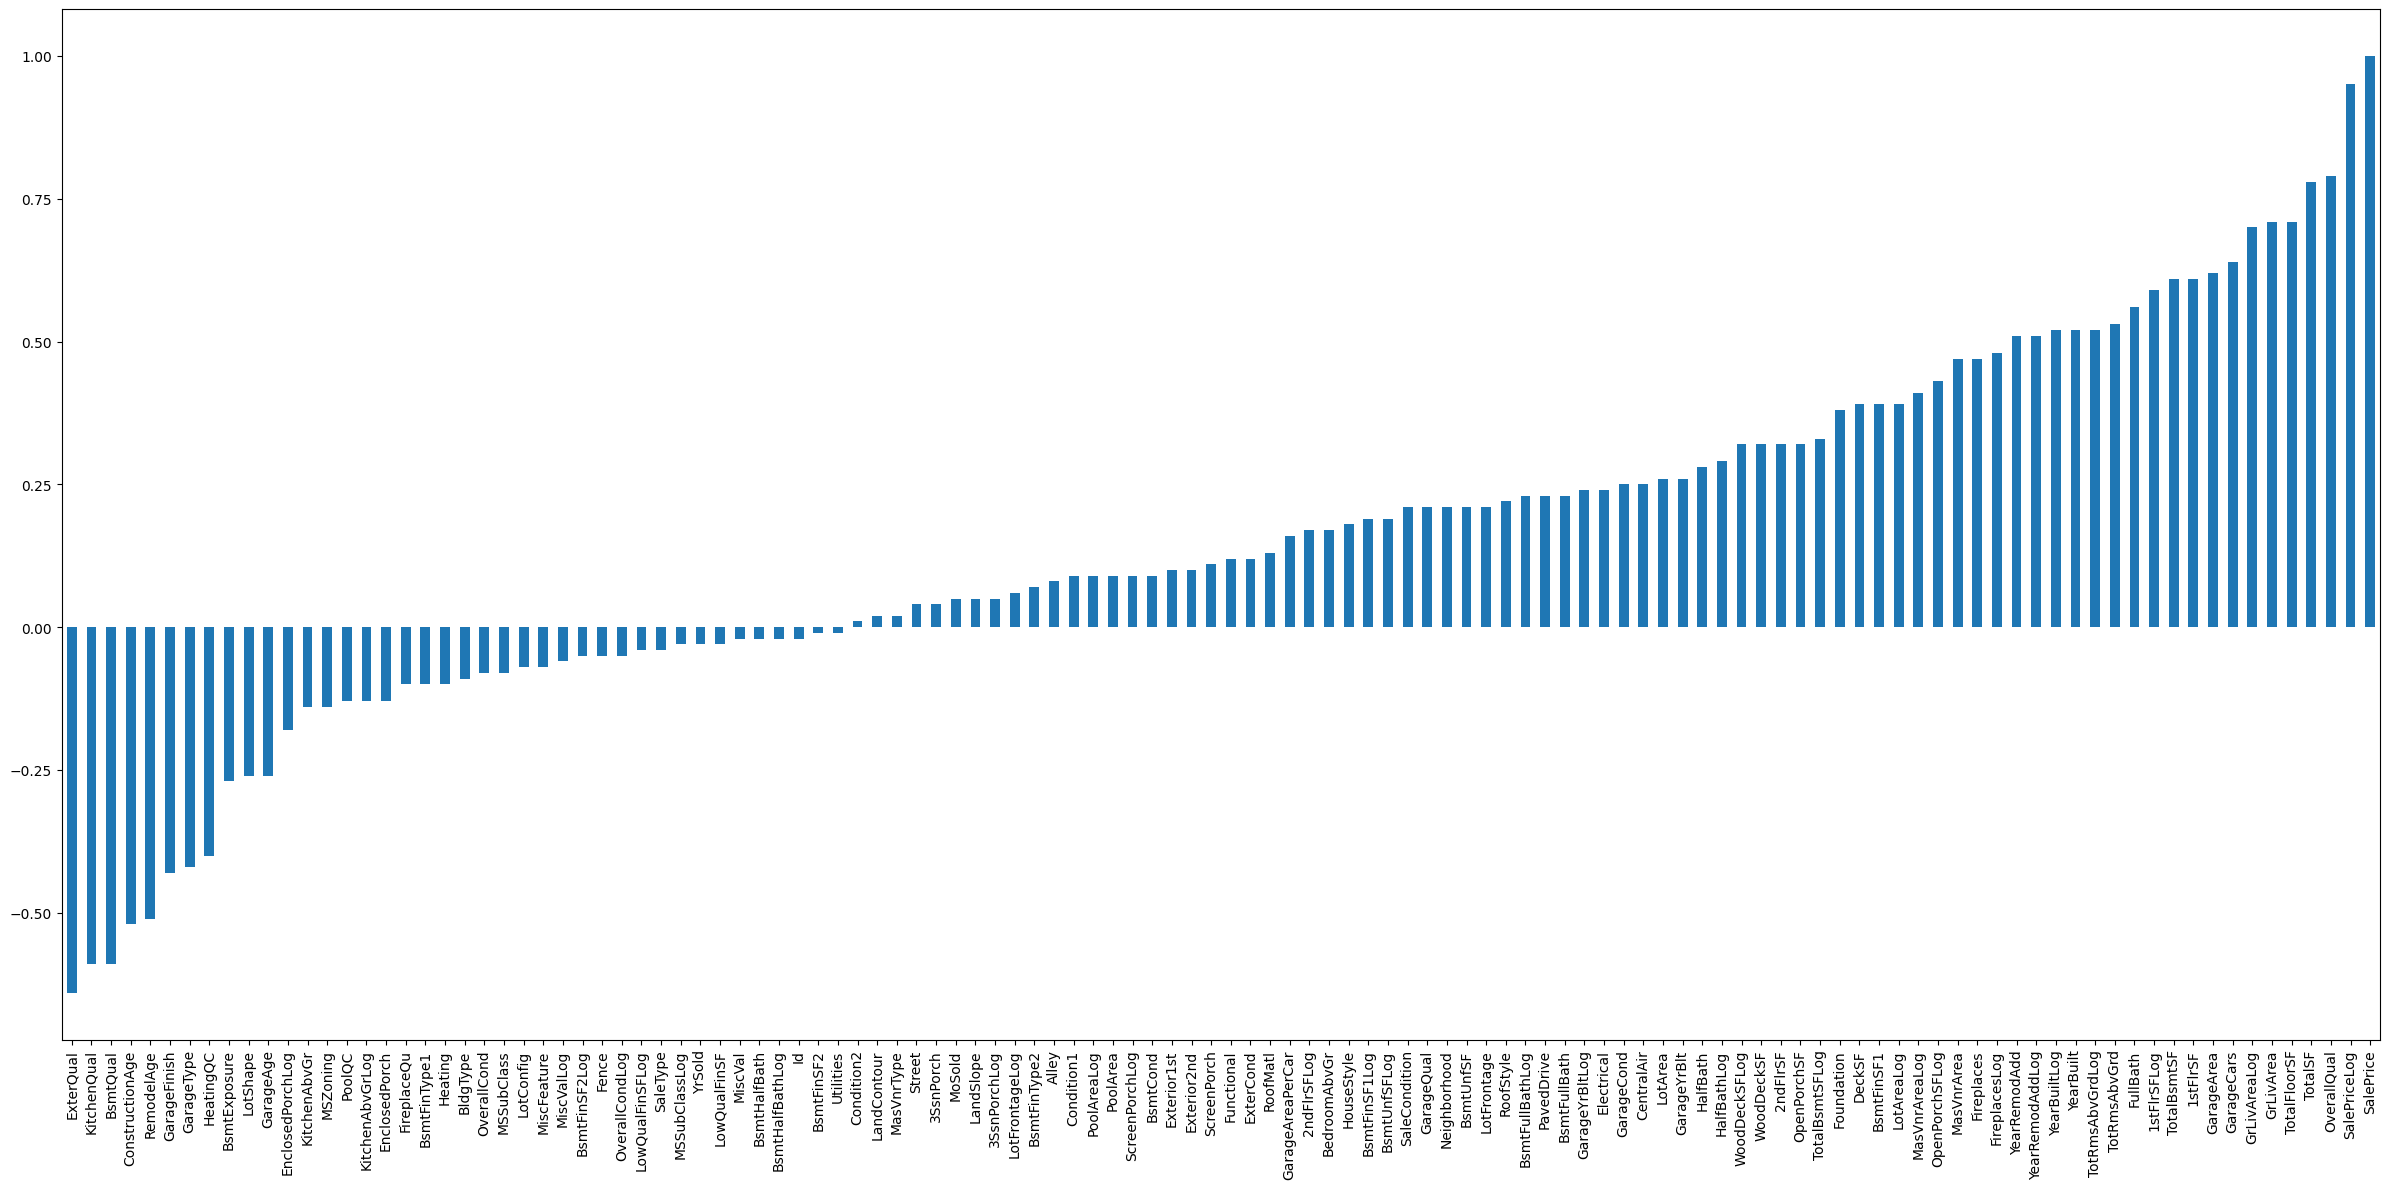

In [32]:
vf_train_corr = vf_train.corr().round(2)
plt.figure(figsize=(24, 12))
vf_train_corr['SalePrice'].sort_values().plot(kind='bar')
plt.tight_layout()
plt.show()

<Axes: >

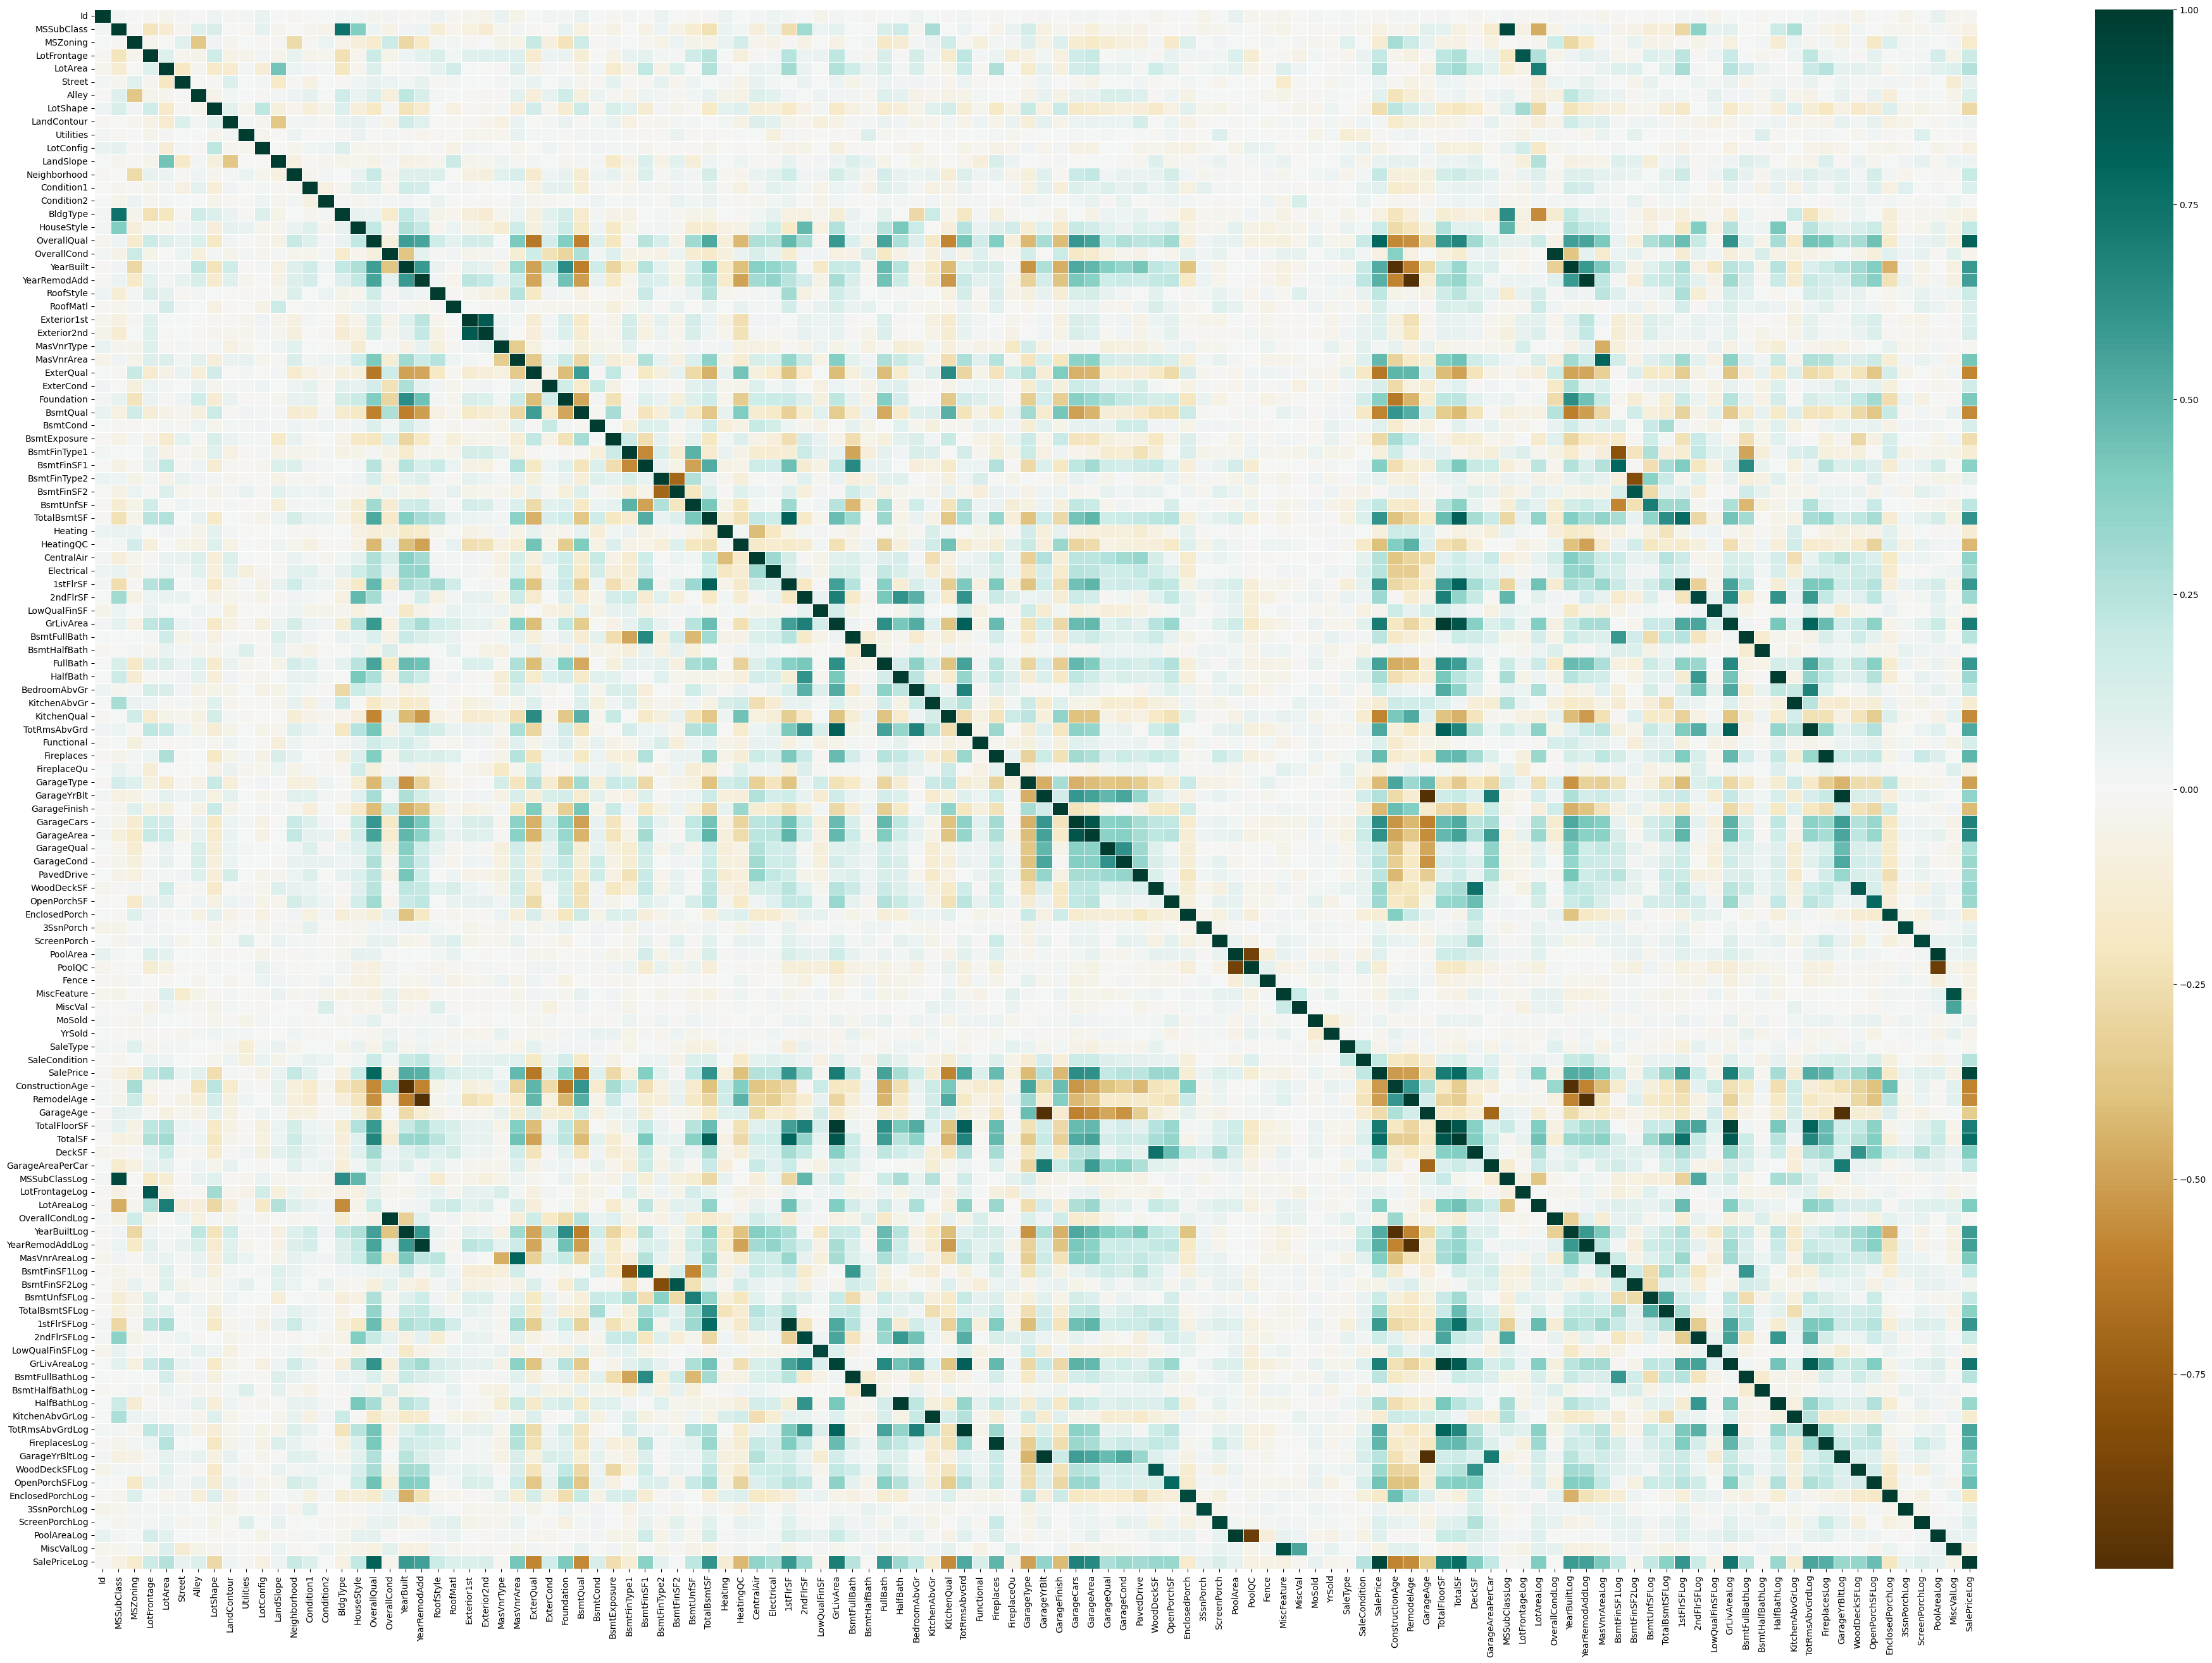

In [33]:
plt.figure(figsize=(48, 32))
sns.heatmap(vf_train.corr(), cmap='BrBG', fmt='0.2f', linewidths=0.5, annot_kws={'size': 16})

In [34]:
imp_cols = vf_train_corr['SalePrice'][vf_train_corr['SalePrice'].abs() > 0.2].drop('SalePrice').sort_values()
imp_cols

ExterQual         -0.64
BsmtQual          -0.59
KitchenQual       -0.59
ConstructionAge   -0.52
RemodelAge        -0.51
GarageFinish      -0.43
GarageType        -0.42
HeatingQC         -0.40
BsmtExposure      -0.27
GarageAge         -0.26
LotShape          -0.26
Neighborhood       0.21
GarageQual         0.21
BsmtUnfSF          0.21
LotFrontage        0.21
SaleCondition      0.21
RoofStyle          0.22
BsmtFullBathLog    0.23
BsmtFullBath       0.23
PavedDrive         0.23
Electrical         0.24
GarageYrBltLog     0.24
GarageCond         0.25
CentralAir         0.25
GarageYrBlt        0.26
LotArea            0.26
HalfBath           0.28
HalfBathLog        0.29
WoodDeckSFLog      0.32
2ndFlrSF           0.32
WoodDeckSF         0.32
OpenPorchSF        0.32
TotalBsmtSFLog     0.33
Foundation         0.38
DeckSF             0.39
LotAreaLog         0.39
BsmtFinSF1         0.39
MasVnrAreaLog      0.41
OpenPorchSFLog     0.43
MasVnrArea         0.47
Fireplaces         0.47
FireplacesLog   

## Feature Engineering

In [43]:
X_train_final = vf_train.drop(['SalePrice', 'SalePriceLog'], axis=1)
# X_train_final = vf_train[imp_cols.index.to_list()]
Y_train_final = vf_train['SalePriceLog']

X_test_final = vf_test
# X_test_final = vf_test[imp_cols.index.to_list()]

display(X_train_final.head(3))
display(Y_train_final.head(3))
display(X_test_final.head(3))

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         4         65.0     8450       1      1         3   
1   2          20         4         80.0     9600       1      1         3   
2   3          60         4         68.0    11250       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           13           14           1   
1          1976          1         1            9            9           2   
2          2002          1         1           13           14           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         4   
1         0.0          3          4           1         2         4   
2       162.0          2          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             2         706             6           0   
1             1             0         978             6           0   
2             3             2         486             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           5   
1        284         1262        1          0           1           5   
2        434          920        1          0           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   

   FullBath  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         2  ...           0           61              0          0   
1         2  ...         298            0              0          0   
2         2  ...           0           42              0          0   

   ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0       3      2            1        0       2    2008   
1            0         0       3      2            1        0       5    2007   
2            0         0       3      2            1        0       9    2008   

   SaleType  SaleCondition  ConstructionAge  RemodelAge  GarageAge  \
0         9              4                5           5          5   
1         9              4               31          31         31   
2         9              4                7           6          7   

   TotalFloorSF  TotalSF  DeckSF  GarageAreaPerCar  MSSubClassLog  \
0          1710     2566      61             274.0       4.110874   
1          1262     2524     298             230.0       3.044522   
2          1786     2706      42             304.0       4.110874   

   LotFrontageLog  LotAreaLog  OverallCondLog  YearBuiltLog  YearRemodAddLog  \
0        4.189655    9.042040        1.791759      7.602900         7.602900   
1        4.394449    9.169623        2.197225      7.589336         7.589336   
2        4.234107    9.328212        1.791759      7.601902         7.602401   

   MasVnrAreaLog  BsmtFinSF1Log  BsmtFinSF2Log  BsmtUnfSFLog  TotalBsmtSFLog  \
0       5.283204  

0    12.247699
1    12.109016
2    12.317171
Name: SalePriceLog, dtype: float64

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20         3         80.0    11622       1      1         3   
1  1462          20         4         81.0    14267       1      1         0   
2  1463          60         4         74.0    13830       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            12           1   
1            3          0          0          0            12           2   
2            3          0          4          0             8           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            5            6       1961   
1           2         0           2            6            6       1958   
2           2         0           5            5            5       1997   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          1         1           13           14           2   
1          1958          3         1           14           15           1   
2          1998          1         1           13           14           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         4         4   
1       108.0          3          4           1         4         4   
2         0.0          3          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             5       468.0             3       144.0   
1             4             0       923.0             6         0.0   
2             4             2       791.0             6         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        1          4           1           5   
1      406.0       1329.0        1          4           1           5   
2      137.0        928.0        1          2           1           5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   

   FullBath  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         1  ...         140            0              0          0   
1         1  ...         393           36              0          0   
2         2  ...         212           34              0          0   

   ScreenPorch  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  \
0          120         0       3      3            1        0       6    2010   
1            0         0       3      2            0    12500       6    2010   
2            0         0       3      3            1        0       3    2010   

   SaleType  SaleCondition  ConstructionAge  RemodelAge  GarageAge  \
0         9              4               49          49         49   
1         9              4               52          52         52   
2         9              4               13          12         13   

   TotalFloorSF  TotalSF  DeckSF  GarageAreaPerCar  MSSubClassLog  \
0           896   1778.0     260             730.0       3.044522   
1          1329   2658.0     429             312.0       3.044522   
2          1629   2557.0     246             241.0       4.110874   

   LotFrontageLog  LotAreaLog  OverallCondLog  YearBuiltLog  YearRemodAddLog  \
0        4.394449    9.360741        1.945910      7.581720         7.581720   
1        4.406719    9.565775        1.945910      7.580189         7.580189   
2        4.317488    9.534668        1.791759      7.599902         7.600402   

   MasVnrAreaLog  BsmtFinSF1Log  BsmtFinSF2Log  BsmtUnfSFLog  TotalBsmtSFLog  \
0       0.00

## Model Evaluation

In [44]:
def get_model_name(model):
    if isinstance(model, Pipeline):
        pipeline_name = '_'.join([step[0] for step in model.steps])
        return pipeline_name
    return model.__class__.__name__

In [45]:
models = [
    LinearRegression(),
    Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge()),
    ]),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    # SVR(),
    # Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('linear_svr', LinearSVR()),
    # ]),
    # NuSVR(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(DecisionTreeRegressor(), learning_rate=0.1),
    XGBRegressor(),
    LGBMRegressor(),
]

In [46]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = []
cv_names = []
cv_means = []
cv_std = []

for model in tqdm(models):
    cv_result = cross_val_score(model, X_train_final, y=Y_train_final, 
                                scoring='r2', cv=kfold, n_jobs=4)
    cv_results.append(cv_result)
    cv_names.append(get_model_name(model))
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    'CrossValMeans': cv_means,
    'CrossValErrors': cv_std,
    'Algorithm': cv_names
})

  0%|          | 0/9 [00:00<?, ?it/s]

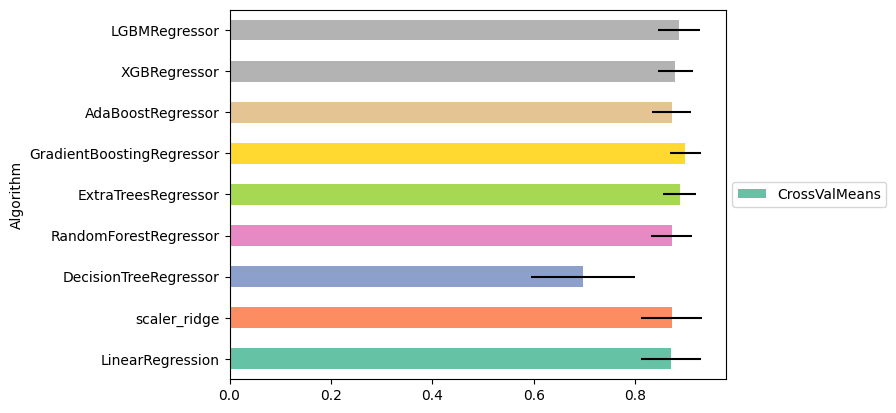

In [47]:
colors = cm.Set2(range(len(cv_res)))
cv_res.plot(kind='barh', y='CrossValMeans', x='Algorithm', xerr=cv_std, color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [48]:
cv_res['criterion'] = cv_res['CrossValMeans'] - (cv_res['CrossValErrors']/2)
cv_res.sort_values(by='criterion', ascending=False)

CrossValMeans  CrossValErrors                  Algorithm  criterion
5       0.897715        0.030481  GradientBoostingRegressor   0.882475
4       0.886830        0.033091        ExtraTreesRegressor   0.870285
8       0.885542        0.040748              LGBMRegressor   0.865168
7       0.878895        0.033891               XGBRegressor   0.861949
6       0.871068        0.037671          AdaBoostRegressor   0.852233
3       0.871607        0.040597      RandomForestRegressor   0.851308
1       0.871190        0.059758               scaler_ridge   0.841311
0       0.870116        0.058650           LinearRegression   0.840791
2       0.696756        0.102157      DecisionTreeRegressor   0.645677

In [49]:
[(idx, cv_names[idx]) for idx in cv_res.query('criterion > 0.8').index]

[(0, 'LinearRegression'),
 (1, 'scaler_ridge'),
 (3, 'RandomForestRegressor'),
 (4, 'ExtraTreesRegressor'),
 (5, 'GradientBoostingRegressor'),
 (6, 'AdaBoostRegressor'),
 (7, 'XGBRegressor'),
 (8, 'LGBMRegressor')]

In [50]:
for model_idx in tqdm(cv_res.query('criterion > 0.8').index):
    algo = cv_names[model_idx]
    model = models[model_idx]
    print(f'predicting: {algo}')
    model.fit(X_train_final, Y_train_final)
    y_pred = model.predict(X_test_final)
    
    y_test = pd.concat([vf_test[['Id']], pd.DataFrame(np.expm1(y_pred), columns=['SalePrice'])], axis=1)
    print(y_test.head(2))
    
    output_file = f'home-data_output/Log_{algo}.csv'
    y_test.to_csv(output_file, index=False)

  0%|          | 0/8 [00:00<?, ?it/s]

predicting: LinearRegression
     Id      SalePrice
0  1461  116652.897704
1  1462  166164.035882
predicting: scaler_ridge
     Id      SalePrice
0  1461  115833.358915
1  1462  164687.438780
predicting: RandomForestRegressor
     Id      SalePrice
0  1461  124311.371938
1  1462  153419.724731
predicting: ExtraTreesRegressor
     Id      SalePrice
0  1461  121990.954172
1  1462  148856.627594
predicting: GradientBoostingRegressor
     Id      SalePrice
0  1461  124538.163934
1  1462  159993.138615
predicting: AdaBoostRegressor
     Id  SalePrice
0  1461   125000.0
1  1462   157000.0
predicting: XGBRegressor
     Id      SalePrice
0  1461  119285.265625
1  1462  157643.187500
predicting: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7778
[LightGBM] [Info] Number of da

In [51]:
def create_grid_searches(models_config, X_train, y_train, cv=kfold, n_jobs=4, verbose=1):
    results = {}
    
    for model_name, (model, param_grid) in tqdm(models_config.items()):
        print("\n" + "="*50)
        print(f"{model_name} Grid Search")
        print("="*50)
        
        gs = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=n_jobs, verbose=verbose)
        gs.fit(X_train, y_train)
        
        results[model_name] = {
            'best_model': gs.best_estimator_,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'gs_object': gs
        }
        
        print(f"Best Score: {gs.best_score_:.4f}")
        print(f"Best Params: {gs.best_params_}")
    
    return results

In [52]:
rf_param_grid = {
    "max_depth": [int(x) for x in np.linspace(1, 20, num = 5)] + [None],
    "max_features": ['log2', 'sqrt', None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
    "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 1400, num = 4)],
}

# et_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

gb_param_grid = {
    'loss' : ['squared_error'],
    'n_estimators' : [1, 2, 4, 32, 100, 150, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'max_depth': [1, 2, 4, 8, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5]
}

# ada_param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
#     'loss': ['linear', 'square', 'exponential']
# }

xgb_param_grid = {
    'n_estimators' : [1, 2, 4, 32, 100, 150, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'min_child_weight': np.linspace(1, 10, 5, endpoint=True),
    'gamma': np.linspace(0.5, 5, 5, endpoint=True),
    'subsample': np.linspace(0.5, 1, 5, endpoint=True),
    'colsample_bytree': np.linspace(0.5, 1, 5, endpoint=True),
    'max_depth': [1, 2, 4, 8, 10],
}

lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [10, 20, 30]
}

best_models_config = {
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), rf_param_grid),
    # 'ExtraTreesRegressor': (ExtraTreesRegressor(random_state=42), et_param_grid),
    'GradientBoostingRegressor': (GradientBoostingRegressor(random_state=42), gb_param_grid),
    # 'AdaBoostRegressor': (AdaBoostRegressor(random_state=42), ada_param_grid),
    'XGBRegressor': (XGBRegressor(random_state=42, verbosity=0), xgb_param_grid),
    'LGBMRegressor': (LGBMRegressor(random_state=42, verbosity=-1), lgb_param_grid),
}

In [ ]:
grid_results = create_grid_searches(best_models_config, X_train_final, Y_train_final, cv=kfold)

  0%|          | 0/4 [00:00<?, ?it/s]


RandomForestRegressor Grid Search
Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


In [114]:
grid_results

NameError: name 'grid_results' is not defined

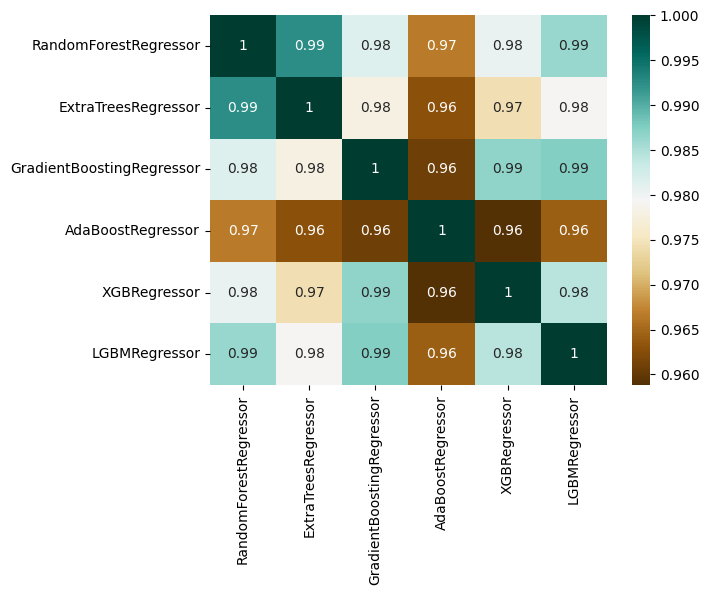

In [188]:
test_results = [
    pd.Series(model_results['best_model'].predict(X_test_final), name=model_name)
    for model_name, model_results in grid_results.items()
]

ensemble_results = pd.concat(test_results, axis=1)
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='BrBG')

In [113]:
ensemble_results.head(3)

NameError: name 'ensemble_results' is not defined

In [201]:
for algo in tqdm(ensemble_results.columns):
    print(f'processing {algo}')
    y_test = pd.concat([vf_test[['Id']], pd.DataFrame(ensemble_results[algo].to_numpy(), columns=['SalePrice'])], axis=1)
    print(y_test.head(2))
    
    output_file = f'home-data_output/GridSearch_{algo}.csv'
    y_test.to_csv(output_file, index=False)

  0%|          | 0/6 [00:00<?, ?it/s]

processing RandomForestRegressor
     Id      SalePrice
0  1461  127632.500000
1  1462  154808.305556
processing ExtraTreesRegressor
     Id      SalePrice
0  1461  126642.370000
1  1462  153910.063333
processing GradientBoostingRegressor
     Id      SalePrice
0  1461  122286.014294
1  1462  163053.393427
processing AdaBoostRegressor
     Id      SalePrice
0  1461  119179.454259
1  1462  144969.903226
processing XGBRegressor
     Id      SalePrice
0  1461  128060.984375
1  1462  171282.359375
processing LGBMRegressor
     Id      SalePrice
0  1461  125576.574587
1  1462  153388.516952


In [202]:
pd.read_csv('home-data_output/GridSearch_GradientBoostingRegressor.csv')

Id      SalePrice
0     1461  122286.014294
1     1462  163053.393427
2     1463  182326.570638
3     1464  186333.986503
4     1465  180601.630026
...    ...            ...
1454  2915   63251.528085
1455  2916   77962.670684
1456  2917  163847.901089
1457  2918  106160.983176
1458  2919  233035.850761

[1459 rows x 2 columns]